In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

additional-kiva-snapshot
data-science-for-good-kiva-crowdfunding
multidimensional-poverty-measures



In [3]:
kiva_loans_data = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
kiva_mpi_locations_data = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
loan_theme_ids_data = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv")
loan_themes_by_region_data = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv")
# Additional kiva snapshot data set
loans_data = pd.read_csv("../input/additional-kiva-snapshot/loans.csv")
lenders_data = pd.read_csv("../input/additional-kiva-snapshot/lenders.csv")
loans_lenders_data = pd.read_csv("../input/additional-kiva-snapshot/loans_lenders.csv")
country_stats_data = pd.read_csv("../input/additional-kiva-snapshot/country_stats.csv")
#geconv4_data = pd.read_csv("../input/additional-kiva-snapshot/GEconV4.csv")
# Multidimensional Poverty Measures Data set
mpi_national_data = pd.read_csv("../input/multidimensional-poverty-measures/MPI_national.csv")
mpi_subnational_data = pd.read_csv("../input/multidimensional-poverty-measures/MPI_subnational.csv")

In [4]:
print("Size of kiva_loans_data",kiva_loans_data.shape)
print("Size of kiva_mpi_locations_data",kiva_mpi_locations_data.shape)
print("Size of loan_theme_ids_data",loan_theme_ids_data.shape)
print("Size of loan_themes_by_region_data",loan_themes_by_region_data.shape)
print("***** Additional kiva snapshot******")
print("Size of loans_data",loans_data.shape)
print("Size of lenders_data",lenders_data.shape)
print("Size of loans_lenders_data",loans_lenders_data.shape)
print("Size of country_stats_data",country_stats_data.shape)
#print("Size of geconv4_data",geconv4_data.shape)
print("*****Multidimensional Poverty Measures Data set******")
print("Size of mpi_national_data",mpi_national_data.shape)
print("Size of mpi_subnational_data",mpi_subnational_data.shape)

Size of kiva_loans_data (671205, 20)
Size of kiva_mpi_locations_data (2772, 9)
Size of loan_theme_ids_data (779092, 4)
Size of loan_themes_by_region_data (15736, 21)
***** Additional kiva snapshot******
Size of loans_data (1419607, 31)
Size of lenders_data (2349174, 11)
Size of loans_lenders_data (1387432, 2)
Size of country_stats_data (174, 13)
*****Multidimensional Poverty Measures Data set******
Size of mpi_national_data (102, 8)
Size of mpi_subnational_data (984, 8)


In [5]:
kiva_loans_data.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [6]:
kiva_mpi_locations_data.head()

LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210

In [7]:
loan_theme_ids_data.head()

id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0

In [8]:
loan_themes_by_region_data.head()

Partner ID               Field Partner Name                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   

     Loan Theme ID         Loan Theme Type   country forkiva  \
0  a1050000000slfi        Higher Education  Cambodia      No   
1  a10500000068jPe  Vulnerable Populations  Cambodia      No   
2  a1050000000slfi        Higher Education  Cambodia      No   
3  a10500000068jPe  Vulnerable Populations  Cambodia      No   
4  a1050000002X1Uu              Sanitation  Cambodia      No   

                  region     geocode_old  ISO  number  amount  \
0       Banteay Meanchey  (13.75, 103.0)  KHM       1     450   
1    Battambang Province             NaN  KHM      58   20275   
2    Battambang Province             NaN  KHM       7    9150   
3  Kampong Cham Province   (12.0, 105.5)  KHM    1383  604950   
4  Kampong Cham Province   (12.0, 105.5)  KHM       3     275   

                      LocationName                      geocode  \
0       Banteay Meanchey, Cambodia  [(13.6672596, 102.8975098)]   
1    Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
2    Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
3  Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
4  Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   

                                 names                        geo        lat  \
0  Banteay Meanchey Province; Cambodia  (13.6672596, 102.8975098)  13.667260   
1        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
2        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
3      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
4      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   

          lon                   mpi_region                    mpi_geo  \
0  102.897510  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
1  102.989615  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
2  102.989615  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
3  105.313119       Kampong Cham, Cambodia  (11.9924294, 105.4645408)   
4  105.313119       Kampong Cham, Cambodia  (11.9924294, 105.4645408)   

   rural_pct  
0       90.0  
1       90.0  
2       90.0  
3       90.0  
4       90.0

In [9]:
loans_data .head()

loan_id       loan_name original_language  \
0   657307            Aivy           English   
1   657259  Idalia Marizza           Spanish   
2   658010           Aasia           English   
3   659347         Gulmira           Russian   
4   656933         Ricky\t           English   

                                         description  \
0  Aivy, 21 years of age, is single and lives in ...   
1  Doña Idalia, esta casada, tiene 57 años de eda...   
2  Aasia is a 45-year-old married lady and she ha...   
3  Гулмире 36 лет, замужем, вместе с супругом вос...   
4  Ricky is a farmer who currently cultivates his...   

                              description_translated  funded_amount  \
0                                                NaN          125.0   
1  Idalia, 57, is married and lives with her husb...          400.0   
2                                                NaN          400.0   
3  Gulmira is 36 years old and married.  She and ...          625.0   
4                                                NaN          425.0   

   loan_amount  status  activity_name  sector_name  \
0        125.0  funded  General Store       Retail   
1        400.0  funded  Used Clothing     Clothing   
2        400.0  funded  General Store       Retail   
3        625.0  funded        Farming  Agriculture   
4        425.0  funded        Farming  Agriculture   

                                            loan_use country_code  \
0   to buy additional inventories for her sari-sa...           PH   
1  To buy American clothing such as blouses, shir...           HN   
2              to buy stock of rice, sugar and flour           PK   
3  to buy cucumber and tomato seeds, as well as f...           KG   
4   to buy organic fertilizer and agrochemical pr...           PH   

  country_name                       town_name currency_policy  \
0  Philippines            Ozamiz - Ozamiz City          shared   
1     Honduras               La Lopez, Choloma          shared   
2     Pakistan                       Lala Musa          shared   
3   Kyrgyzstan      Aravan village, Osh region          shared   
4  Philippines  Baleleng, Sto. Thomas, Isabela          shared   

   currency_exchange_coverage_rate currency  partner_id  \
0                              0.1      PHP       126.0   
1                              0.1      HNL       201.0   
2                              0.1      PKR       245.0   
3                              0.1      KGS       171.0   
4                              0.1      PHP       123.0   

                     posted_time        planned_expiration_time  \
0  2014-01-15 02:23:45.000 +0000  2014-02-14 03:30:06.000 +0000   
1  2014-01-14 20:23:20.000 +0000  2014-03-26 22:25:07.000 +0000   
2  2014-01-16 11:32:58.000 +0000  2014-02-15 21:10:05.000 +0000   
3  2014-01-20 09:59:48.000 +0000  2014-02-21 03:10:02.000 +0000   
4  2014-01-14 05:46:21.000 +0000  2014-02-13 06:10:02.000 +0000   

                   disburse_time                    raised_time  lender_term  \
0  2013-12-22 08:00:00.000 +0000  2014-01-15 04:48:22.000 +0000          7.0   
1  2013-12-20 08:00:00.000 +0000  2014-02-25 06:42:06.000 +0000          8.0   
2  2014-01-09 08:00:00.000 +0000  2014-01-24 23:06:18.000 +0000         14.0   
3  2014-01-17 08:00:00.000 +0000  2014-01-22 05:29:28.000 +0000         14.0   
4  2013-12-17 08:00:00.000 +0000  2014-01-14 17:29:27.000 +0000          7.0   

   num_lenders_total  num_journal_entries  num_bulk_entries  \
0                  3                    2                 1   
1                 11                    2                 1   
2                 16                    2                 1   
3                 21                    2                 1   
4                 15                    2                 1   

                                                tags borrower_genders  \
0                                                NaN           female   
1                                                

In [10]:
lenders_data.head()

permanent_name display_name city state country_code  member_since  \
0        qian3013         Qian  NaN   NaN          NaN    1461300457   
1       reena6733        Reena  NaN   NaN          NaN    1461300634   
2         mai5982          Mai  NaN   NaN          NaN    1461300853   
3  andrew86079135       Andrew  NaN   NaN          NaN    1461301091   
4      nguyen6962       Nguyen  NaN   NaN          NaN    1461301154   

  occupation loan_because  loan_purchase_num invited_by  num_invited  
0        NaN          NaN                1.0        NaN            0  
1        NaN          NaN                9.0        NaN            0  
2        NaN          NaN                NaN        NaN            0  
3        NaN          NaN                5.0  Peter Tan            0  
4        NaN          NaN                NaN        NaN            0

In [11]:
loans_lenders_data.head()

loan_id                                            lenders
0   483693  muc888, sam4326, camaran3922, lachheb1865, reb...
1   483738  muc888, nora3555, williammanashi, barbara5610,...
2   485000  muc888, terrystl, richardandsusan8352, sherri4...
3   486087  muc888, james5068, rudi5955, daniel9859, don92...
4   534428  muc888, niki3008, teresa9174, mike4896, david7...

In [12]:
country_stats_data.head() 

country_name country_code country_code3 continent           region  \
0        India           IN           IND      Asia    Southern Asia   
1      Nigeria           NG           NGA    Africa   Western Africa   
2       Mexico           MX           MEX  Americas  Central America   
3     Pakistan           PK           PAK      Asia    Southern Asia   
4   Bangladesh           BD           BGD      Asia    Southern Asia   

   population  population_below_poverty_line       hdi  life_expectancy  \
0  1339180127                           21.9  0.623559           68.322   
1   190886311                           70.0  0.527105           53.057   
2   129163276                           46.2  0.761683           76.972   
3   197015955                           29.5  0.550354           66.365   
4   164669751                           31.5  0.578824           71.985   

   expected_years_of_schooling  mean_years_of_schooling           gni  \
0                    11.696590                 6.298834   5663.474799   
1                     9.970482                 6.000000   5442.901264   
2                    13.299090                 8.554985  16383.106680   
3                     8.106910                 5.089460   5031.173074   
4                    10.178706                 5.241577   3341.490722   

  kiva_country_name  
0             India  
1           Nigeria  
2            Mexico  
3          Pakistan  
4        Bangladesh

In [13]:
mpi_national_data.head()

ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                            33.3      0.000                   0.09   
1                            41.4      0.002                   0.50   
2                            40.2      0.003                   0.70   
3                            35.6      0.012                   3.18   
4                            33.3      0.001                   0.39   

   Intensity of Deprivation Rural  
0                            33.3  
1                            40.3  
2                            37.1  
3                            38.7  
4                            36.9

In [14]:
mpi_subnational_data.head()

ISO country code      Country Sub-national region World region  \
0              AFG  Afghanistan          Badakhshan   South Asia   
1              AFG  Afghanistan             Badghis   South Asia   
2              AFG  Afghanistan             Baghlan   South Asia   
3              AFG  Afghanistan               Balkh   South Asia   
4              AFG  Afghanistan              Bamyan   South Asia   

   MPI National  MPI Regional  Headcount Ratio Regional  \
0         0.295         0.387                      67.5   
1         0.295         0.466                      79.3   
2         0.295         0.300                      59.7   
3         0.295         0.301                      55.7   
4         0.295         0.325                      61.0   

   Intensity of deprivation Regional  
0                               57.3  
1                               58.8  
2                               50.3  
3                               54.1  
4                               53.3

In [15]:
kiva_loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [16]:
kiva_loans_data.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

In [17]:
kiva_loans_data.describe(include=["O"])

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666973       671197   
unique                                             424912           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency                posted_time  \
count        671205  614405   671205                     671205   
unique           87   12695       67                     667399   
top     Philippines  Kaduna      PHP  2017-05-15 00:00:00+00:00   
freq         160441   10000   160440                         25   

                   disbursed_time                funded_time           tags  \
count                      668809                     622874         499789   
unique                       5719                     498007          86719   
top     2017-02-01 08:00:00+00:00  2016-09-21 13:03:24+00:00  user_favorite   
freq                         2800                         33          27088   

       borrower_genders repayment_interval        date  
count            666984             671205      671205  
unique            11298                  4        1298  
top              female            monthly  2017-03-20  
freq             426502             342717        1308

In [18]:
# checking missing data in kiva_loans data 
total = kiva_loans_data.isnull().sum().sort_values(ascending = False)
percent = (kiva_loans_data.isnull().sum()/kiva_loans_data.isnull().count()).sort_values(ascending = False)
missing_kiva_loans_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_loans_data

Total   Percent
tags                171416  0.255385
region               56800  0.084624
funded_time          48331  0.072006
partner_id           13507  0.020124
use                   4232  0.006305
borrower_genders      4221  0.006289
disbursed_time        2396  0.003570
country_code             8  0.000012
date                     0  0.000000
funded_amount            0  0.000000
loan_amount              0  0.000000
activity                 0  0.000000
sector                   0  0.000000
currency                 0  0.000000
country                  0  0.000000
repayment_interval       0  0.000000
posted_time              0  0.000000
term_in_months           0  0.000000
lender_count             0  0.000000
id                       0  0.000000

In [19]:
# missing data in kiva_mpi_locations data 
total = kiva_mpi_locations_data.isnull().sum().sort_values(ascending = False)
percent = (kiva_mpi_locations_data.isnull().sum()/kiva_mpi_locations_data.isnull().count()).sort_values(ascending = False)
missing_kiva_mpi_locations_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_kiva_mpi_locations_data

Total   Percent
lon            1880  0.678211
lat            1880  0.678211
MPI            1788  0.645022
region         1788  0.645022
LocationName   1788  0.645022
world_region   1764  0.636364
country        1764  0.636364
ISO            1764  0.636364
geo               0  0.000000

In [20]:
# missing data in loan_theme_ids data 
total = loan_theme_ids_data.isnull().sum().sort_values(ascending = False)
percent = (loan_theme_ids_data.isnull().sum()/loan_theme_ids_data.isnull().count()).sort_values(ascending = False)
missing_loan_theme_ids_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loan_theme_ids_data

Total   Percent
Partner ID       14813  0.019013
Loan Theme Type  14813  0.019013
Loan Theme ID    14813  0.019013
id                   0  0.000000

In [21]:
# missing data in loan_themes_by_region data 
total = loan_themes_by_region_data.isnull().sum().sort_values(ascending = False)
percent = (loan_themes_by_region_data.isnull().sum()/loan_themes_by_region_data.isnull().count()).sort_values(ascending = False)
missing_loan_themes_by_region_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loan_themes_by_region_data

Total   Percent
geocode_old         14536  0.923742
mpi_geo              6065  0.385422
names                2075  0.131863
lon                  2074  0.131800
lat                  2074  0.131800
geocode              2074  0.131800
rural_pct            1392  0.088460
mpi_region             14  0.000890
ISO                    14  0.000890
country                 0  0.000000
Field Partner Name      0  0.000000
sector                  0  0.000000
Loan Theme ID           0  0.000000
Loan Theme Type         0  0.000000
number                  0  0.000000
forkiva                 0  0.000000
region                  0  0.000000
amount                  0  0.000000
LocationName            0  0.000000
geo                     0  0.000000
Partner ID              0  0.000000

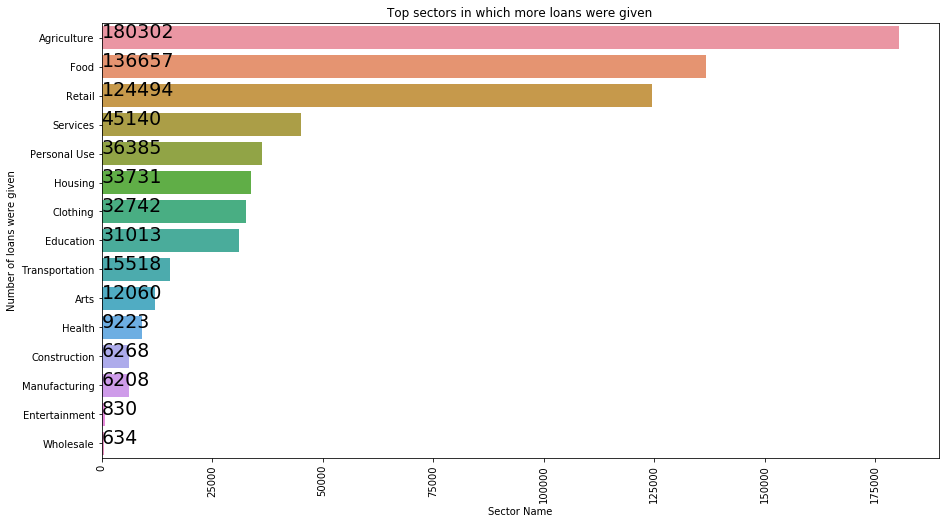

In [22]:
# print("Top sectors in which more loans were given : ", len(kiva_loans_data["sector"].unique()))
# print(kiva_loans_data["sector"].value_counts().head(10))
plt.figure(figsize=(15,8))
sector_name = kiva_loans_data['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Sector Name')
plt.ylabel('Number of loans were given')
plt.title("Top sectors in which more loans were given")
plt.show()

Text(0.5,1,'Types of repayment intervals with their count')

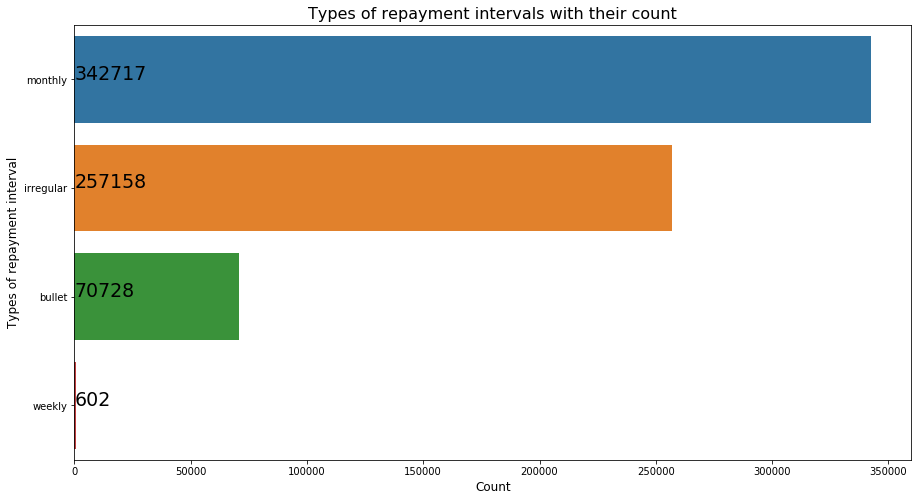

In [23]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['repayment_interval'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Types of repayment interval', fontsize=12)
plt.title("Types of repayment intervals with their count", fontsize=16)

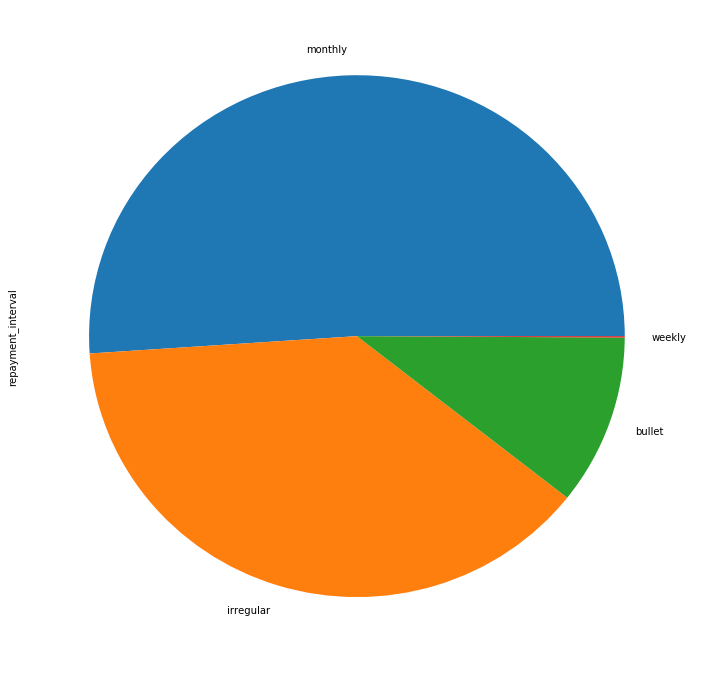

In [24]:
kiva_loans_data['repayment_interval'].value_counts().plot(kind="pie",figsize=(12,12))

Text(0.5,1,'Most frequent countries for kiva loan')

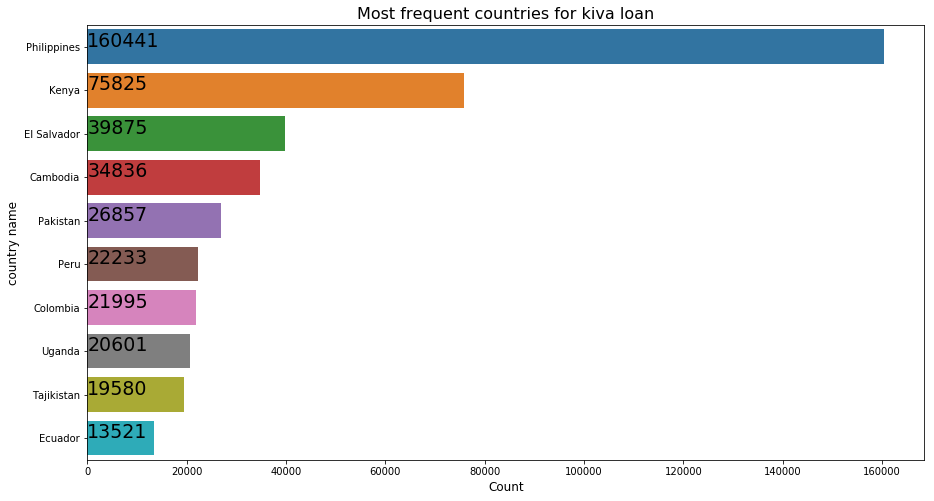

In [25]:
# Plot the most frequent countries
plt.figure(figsize=(15,8))
count = kiva_loans_data['country'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('country name', fontsize=12)
plt.title("Most frequent countries for kiva loan", fontsize=16)

In [26]:
kiva_loans_data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

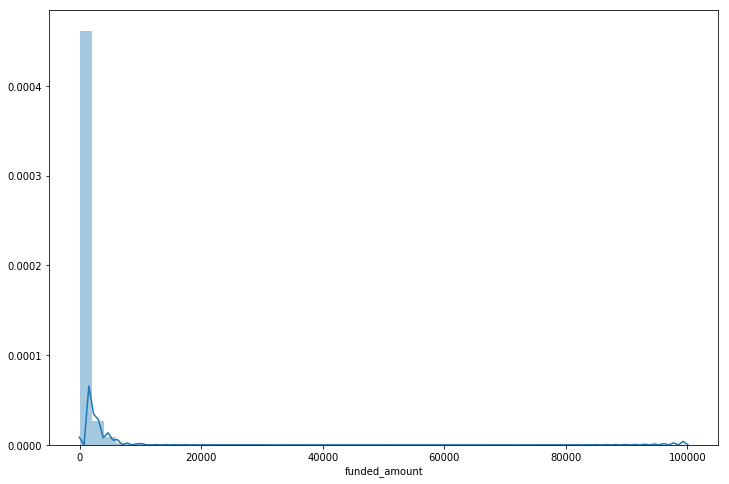

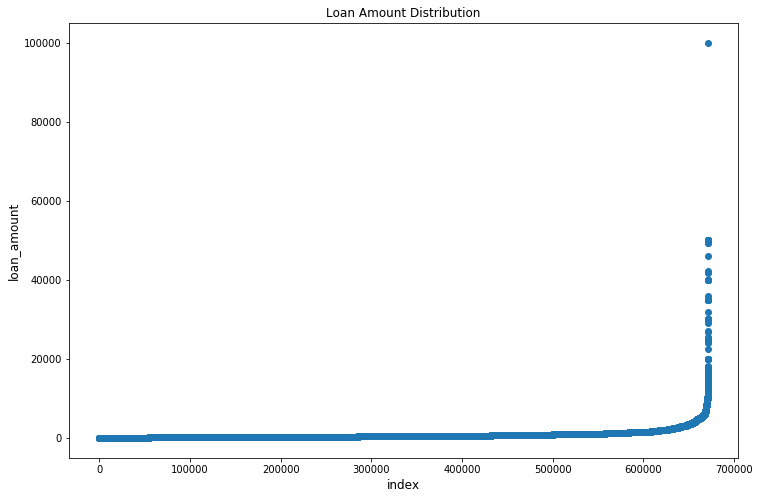

In [27]:
# Distribution of funded anount
plt.figure(figsize = (12, 8))

sns.distplot(kiva_loans_data['funded_amount'])
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(kiva_loans_data.shape[0]), np.sort(kiva_loans_data.funded_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

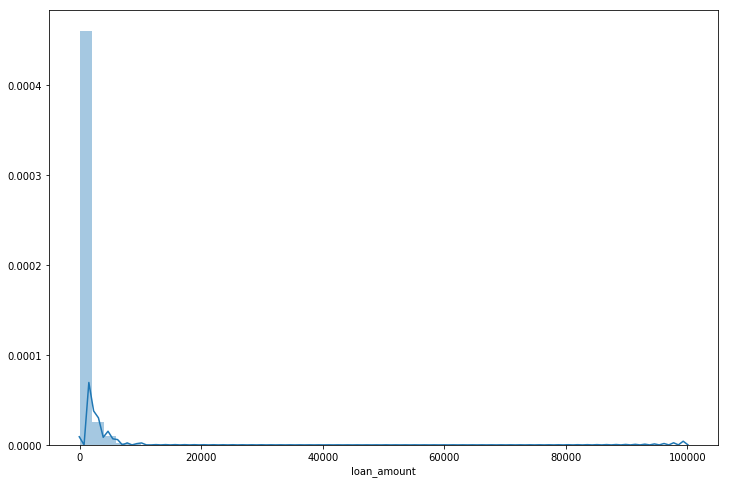

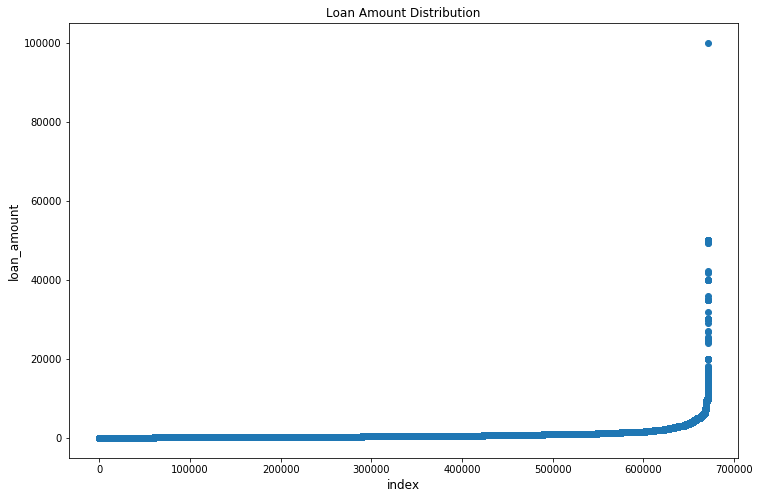

In [28]:
# Distribution of loan amount
plt.figure(figsize = (12, 8))

sns.distplot(kiva_loans_data['loan_amount'])
plt.show()
plt.figure(figsize = (12, 8))

plt.scatter(range(kiva_loans_data.shape[0]), np.sort(kiva_loans_data.loan_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

In [29]:
kiva_mpi_locations_data.columns

Index(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
       'geo', 'lat', 'lon'],
      dtype='object')

Text(0.5,1,'Distribution of world regions')

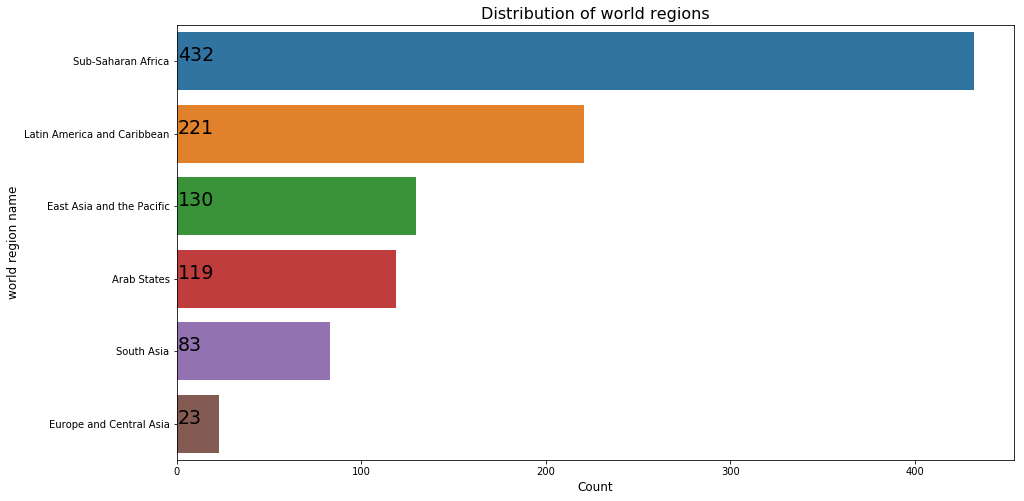

In [30]:
# Distribution of world regions
plt.figure(figsize=(15,8))
count = kiva_mpi_locations_data['world_region'].value_counts()
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('world region name', fontsize=12)
plt.title("Distribution of world regions", fontsize=16)

Number of lenders contributing to loan :  503
8     34204
7     32497
9     32476
1     31995
5     30439
6     29407
10    28171
11    25897
12    25291
4     24616
Name: lender_count, dtype: int64


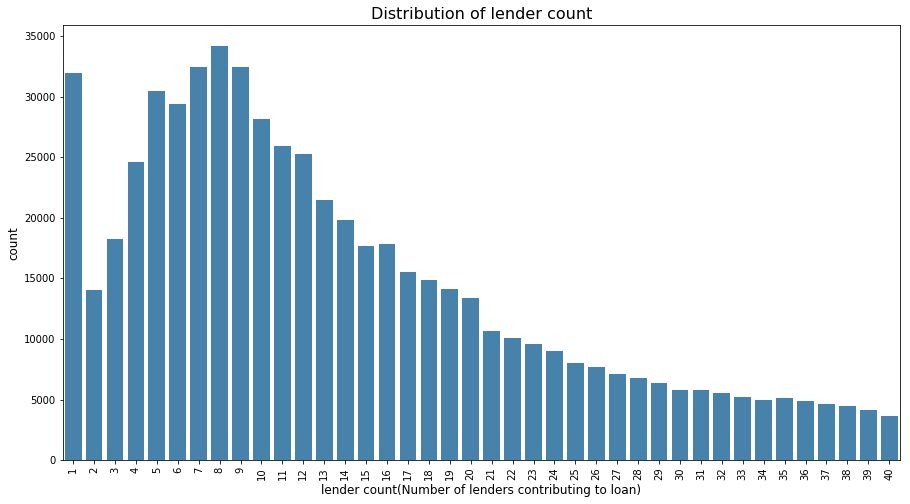

In [31]:
#Distribution of lender count(Number of lenders contributing to loan)
print("Number of lenders contributing to loan : ", len(kiva_loans_data["lender_count"].unique()))
print(kiva_loans_data["lender_count"].value_counts().head(10))
lender = kiva_loans_data['lender_count'].value_counts().head(40)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('lender count(Number of lenders contributing to loan)', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of lender count", fontsize=16)
plt.show()

Text(0.5,1,'Top Loan Activity type')

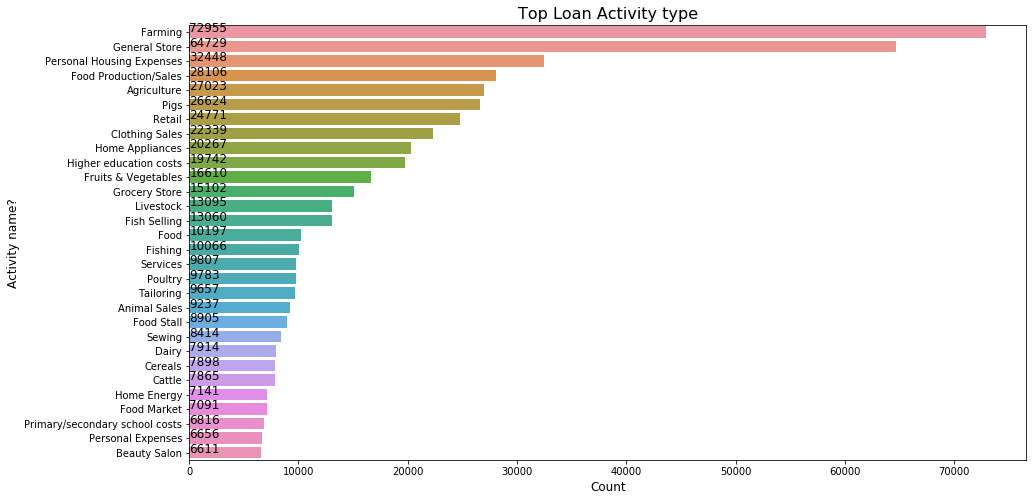

In [32]:
#Distribution of Loan Activity type

plt.figure(figsize=(15,8))
count = kiva_loans_data['activity'].value_counts().head(30)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Activity name?', fontsize=12)
plt.title("Top Loan Activity type", fontsize=16)

Number of months over which loan was scheduled to be paid back :  148
14.0    166750
8.0     143042
11.0     40694
7.0      32847
13.0     30501
20.0     28483
6.0      26039
12.0     25700
15.0     25255
26.0     23431
Name: term_in_months, dtype: int64


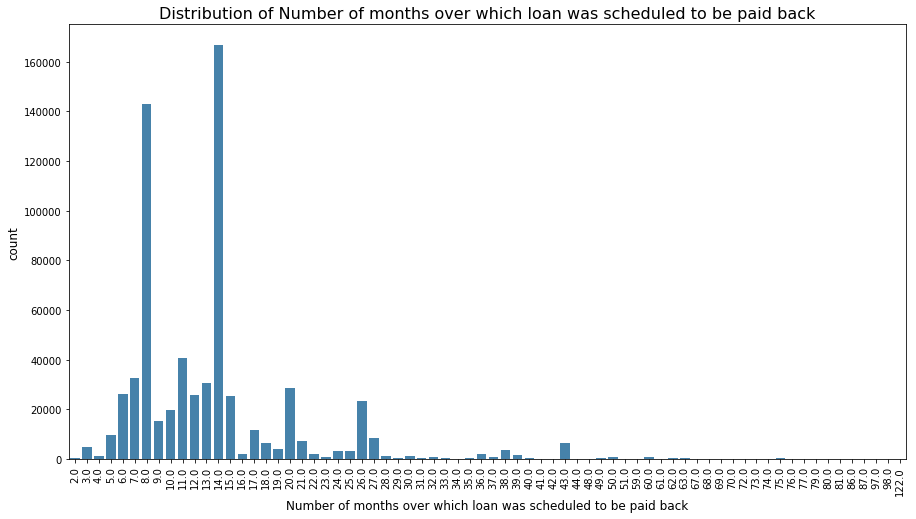

In [33]:
#Distribution of Number of months over which loan was scheduled to be paid back
print("Number of months over which loan was scheduled to be paid back : ", len(kiva_loans_data["term_in_months"].unique()))
print(kiva_loans_data["term_in_months"].value_counts().head(10))
lender = kiva_loans_data['term_in_months'].value_counts().head(70)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Number of months over which loan was scheduled to be paid back', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Distribution of Number of months over which loan was scheduled to be paid back", fontsize=16)
plt.show()

Text(0.5,1,'Distribution of sectors')

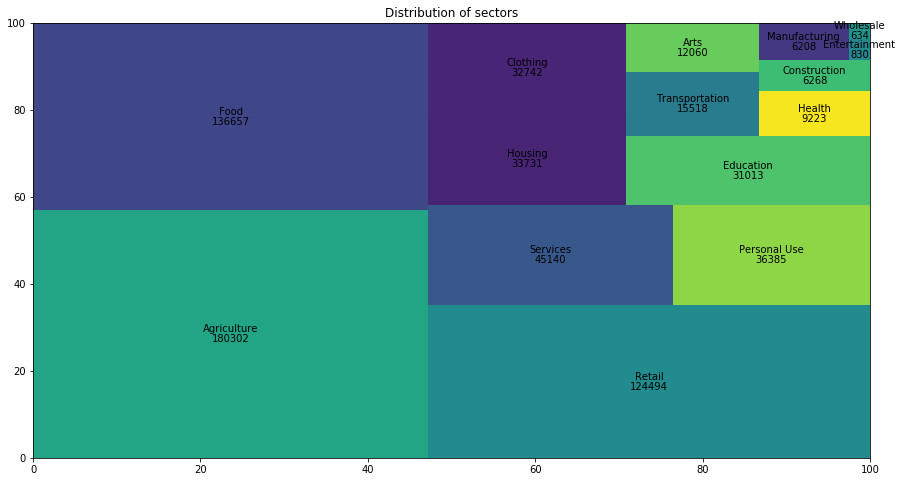

In [34]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['sector'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of sectors')

Text(0.5,1,'Distribution of Activities')

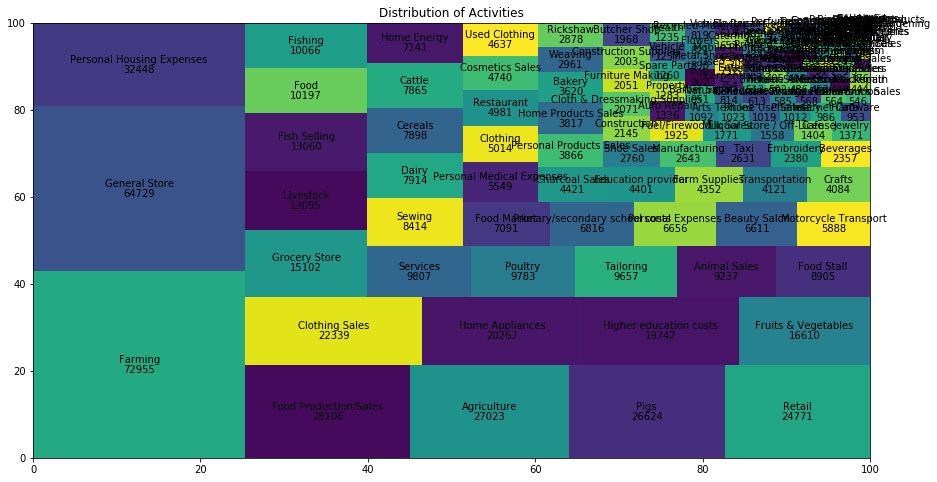

In [35]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['activity'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Activities')

Text(0.5,1,'Distribution of repayment_interval')

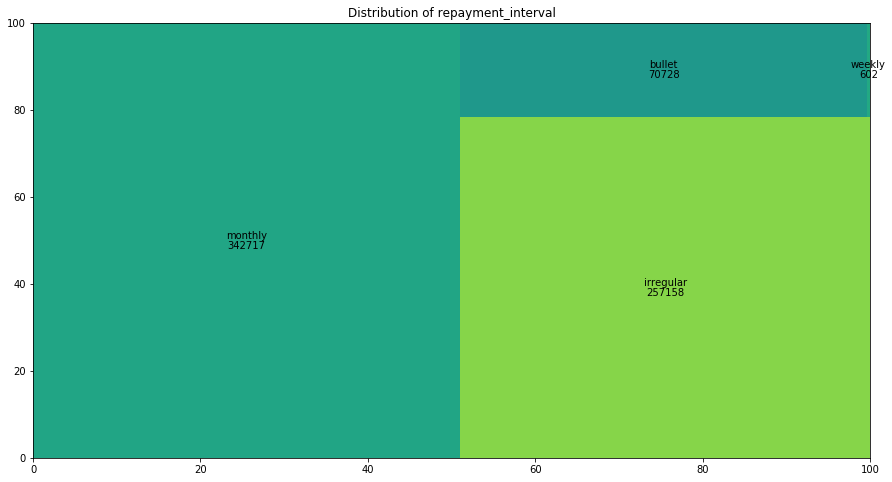

In [36]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['repayment_interval'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of repayment_interval')

Text(0.5,1,'Most popular uses of loans')

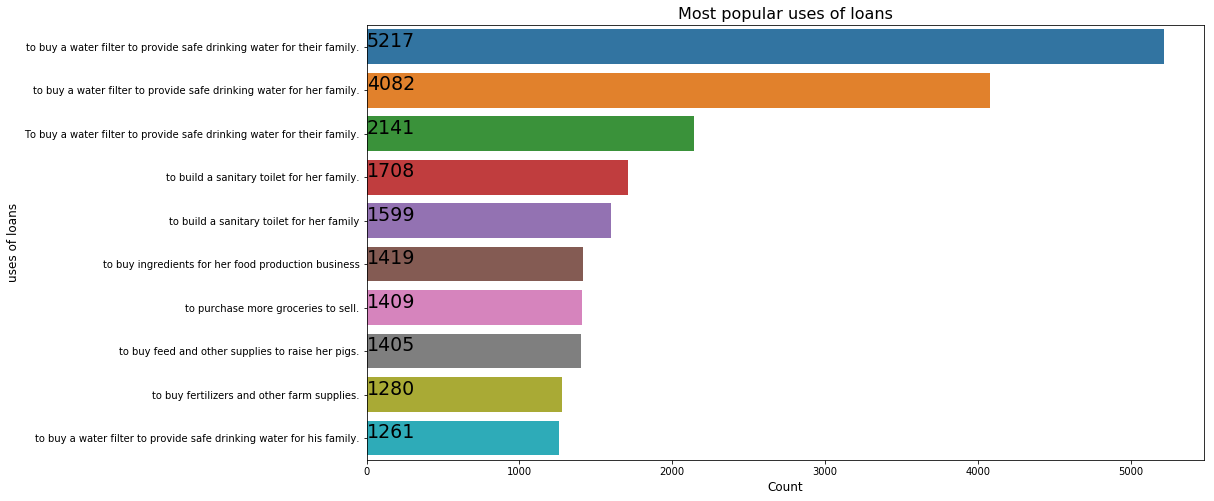

In [37]:
plt.figure(figsize=(15,8))
count = kiva_loans_data['use'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('uses of loans', fontsize=12)
plt.title("Most popular uses of loans", fontsize=16)

In [38]:
gender_list = []
for gender in kiva_loans_data["borrower_genders"].values:
    if str(gender) != "nan":
        gender_list.extend( [lst.strip() for lst in gender.split(",")] )
temp_data = pd.Series(gender_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='Borrower Gender')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

  sex_borrowers  funded_amount
0          male     864.169009
1        female     761.531200


Text(0,0.5,'Average funded Amount(US)')

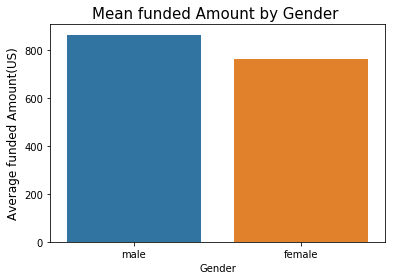

In [39]:
kiva_loans_data.borrower_genders = kiva_loans_data.borrower_genders.astype(str)
gender_data = pd.DataFrame(kiva_loans_data.borrower_genders.str.split(',').tolist())
kiva_loans_data['sex_borrowers'] = gender_data[0]
kiva_loans_data.loc[kiva_loans_data.sex_borrowers == 'nan', 'sex_borrowers'] = np.nan
sex_mean = pd.DataFrame(kiva_loans_data.groupby(['sex_borrowers'])['funded_amount'].mean().sort_values(ascending=False)).reset_index()
print(sex_mean)
g1 = sns.barplot(x='sex_borrowers', y='funded_amount', data=sex_mean)
g1.set_title("Mean funded Amount by Gender ", fontsize=15)
g1.set_xlabel("Gender")
g1.set_ylabel("Average funded Amount(US)", fontsize=12)

Genders count with repayment interval monthly
 female    244088
male       96083
Name: sex_borrowers, dtype: int64
Genders count with repayment interval weekly
 female    571
male       31
Name: sex_borrowers, dtype: int64
Genders count with repayment interval bullet
 male      35580
female    34058
Name: sex_borrowers, dtype: int64
Genders count with repayment interval irregular
 female    234926
male       21647
Name: sex_borrowers, dtype: int64


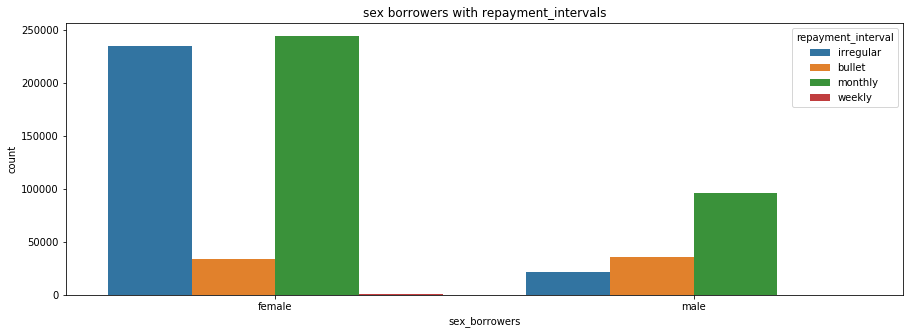

In [40]:
f, ax = plt.subplots(figsize=(15, 5))
print("Genders count with repayment interval monthly\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'monthly'].value_counts())
print("Genders count with repayment interval weekly\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'weekly'].value_counts())
print("Genders count with repayment interval bullet\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'bullet'].value_counts())
print("Genders count with repayment interval irregular\n",kiva_loans_data['sex_borrowers'][kiva_loans_data['repayment_interval'] == 'irregular'].value_counts())

sns.countplot(x="sex_borrowers", hue='repayment_interval', data=kiva_loans_data).set_title('sex borrowers with repayment_intervals');

Top Kiva Field Partner Names with funding count :  302
Alalay sa Kaunlaran (ASKI)                           1207
SEF International                                     992
Gata Daku Multi-purpose Cooperative (GDMPC)           952
Paglaum Multi-Purpose Cooperative (PMPC)              673
Interactuar                                           671
Thanh Hoa Microfinance Institution                    666
South Pacific Business Development (SPBD) - Samoa     398
Bai Tushum Bank                                       393
African Clean Energy (ACE)                            336
VisionFund Cambodia                                   324
Name: Field Partner Name, dtype: int64


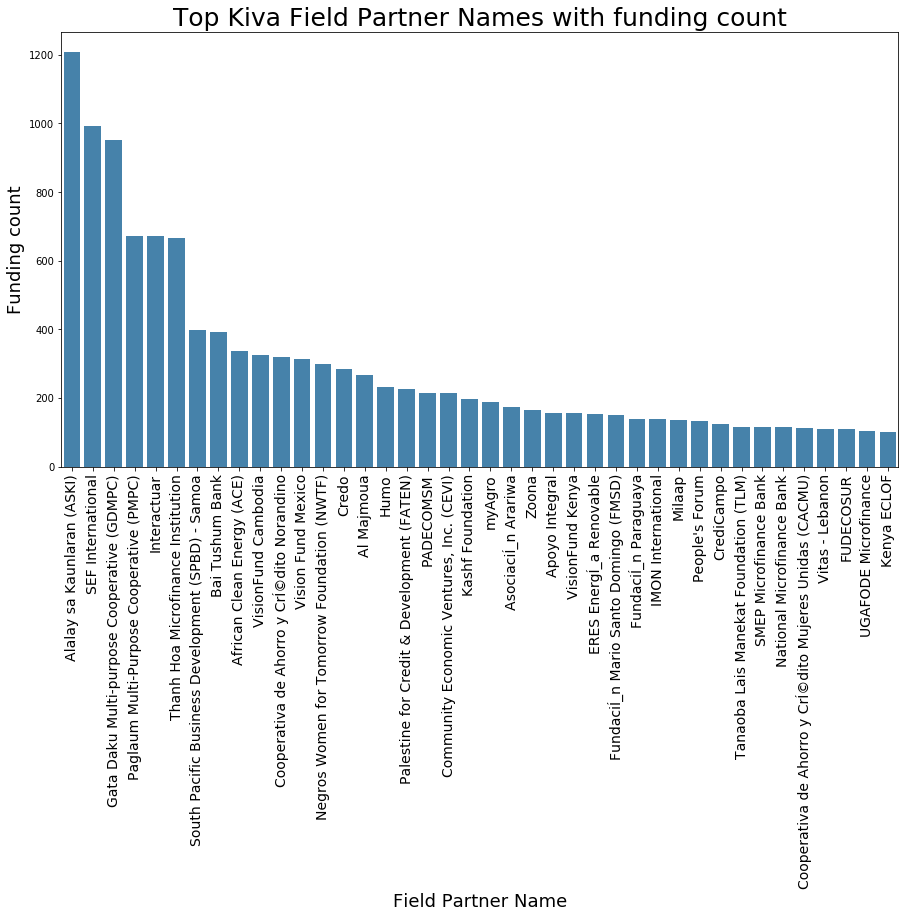

In [41]:
#Distribution of Kiva Field Partner Names with funding count
print("Top Kiva Field Partner Names with funding count : ", len(loan_themes_by_region_data["Field Partner Name"].unique()))
print(loan_themes_by_region_data["Field Partner Name"].value_counts().head(10))
lender = loan_themes_by_region_data['Field Partner Name'].value_counts().head(40)
plt.figure(figsize=(15,8))
sns.barplot(lender.index, lender.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Field Partner Name', fontsize=18)
plt.ylabel('Funding count', fontsize=18)
plt.title("Top Kiva Field Partner Names with funding count", fontsize=25)
plt.show()

In [42]:
countries_funded_amount = kiva_loans_data.groupby('country').mean()['funded_amount'].sort_values(ascending = False)
print("Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)\n",countries_funded_amount.head(10))

Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)(Mean values)
 country
Cote D'Ivoire         50000.000000
Mauritania            15000.000000
Bhutan                 7812.500000
Chile                  7625.000000
Afghanistan            7000.000000
Congo                  6142.578125
Puerto Rico            4409.191176
Dominican Republic     4200.604839
Namibia                4046.875000
United States          3800.843591
Name: funded_amount, dtype: float64


In [43]:
data = [dict(
        type='choropleth',
        locations= countries_funded_amount.index,
        locationmode='country names',
        z=countries_funded_amount.values,
        text=countries_funded_amount.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top Countries with funded_amount(Mean value)'),
)]
layout = dict(title = 'Top Countries with funded_amount(Dollar value of loan funded on Kiva.org)',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

In [44]:
mpi_region_amount = round(loan_themes_by_region_data.groupby('mpi_region').mean()['amount'].sort_values(ascending = False))
print("Top mpi_region with amount(Dollar value of loans funded in particular LocationName)(Mean values)\n",mpi_region_amount.head(10))

Top mpi_region with amount(Dollar value of loans funded in particular LocationName)(Mean values)
 mpi_region
Itasy, Madagascar                                 632550.0
Kaduna, Nigeria                                   527808.0
Harare, Zimbabwe                                  292383.0
Hauts basins, Burkina Faso                        287750.0
Luangprabang, Lao People's Democratic Republic    266200.0
Sud-Kivu, Congo, Democratic Republic of the       206406.0
Del Yuma, Dominican Republic                      191212.0
SEN                                               177896.0
Retalhuleu, Guatemala                             175425.0
RWA                                               172175.0
Name: amount, dtype: float64


In [45]:
data = [dict(
        type='choropleth',
        locations= mpi_region_amount.index,
        locationmode='country names',
        z=mpi_region_amount.values,
        text=mpi_region_amount.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top mpi_regions with amount(Mean value)'),
)]
layout = dict(title = 'Top mpi_regions with amount(Dollar value of loans funded in particular LocationName)',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

Text(0.5,1,'Popular loan sector in terms of loan amount')

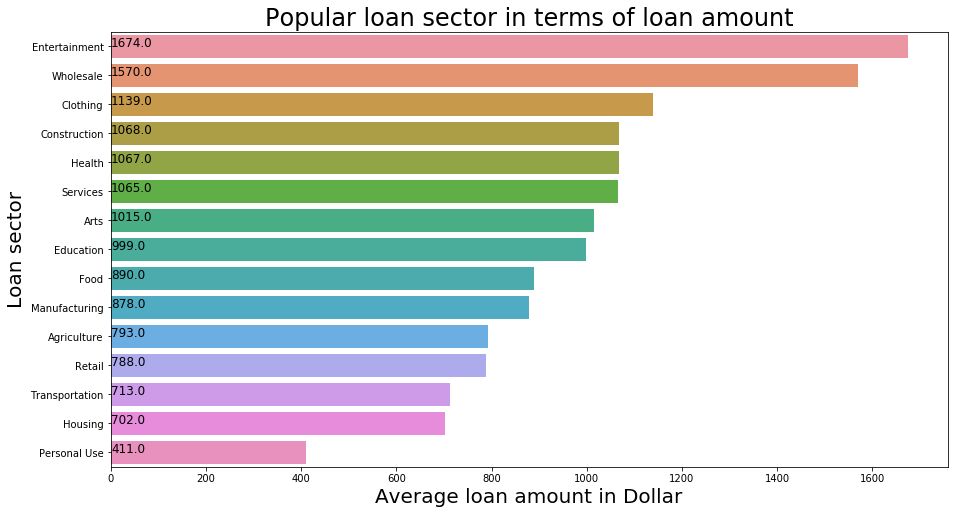

In [46]:
plt.figure(figsize=(15,8))
count = round(kiva_loans_data.groupby(['sector'])['loan_amount'].mean().sort_values(ascending=False))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan sector in terms of loan amount', fontsize=24)

Text(0.5,1,'Popular loan activity in terms of loan amount')

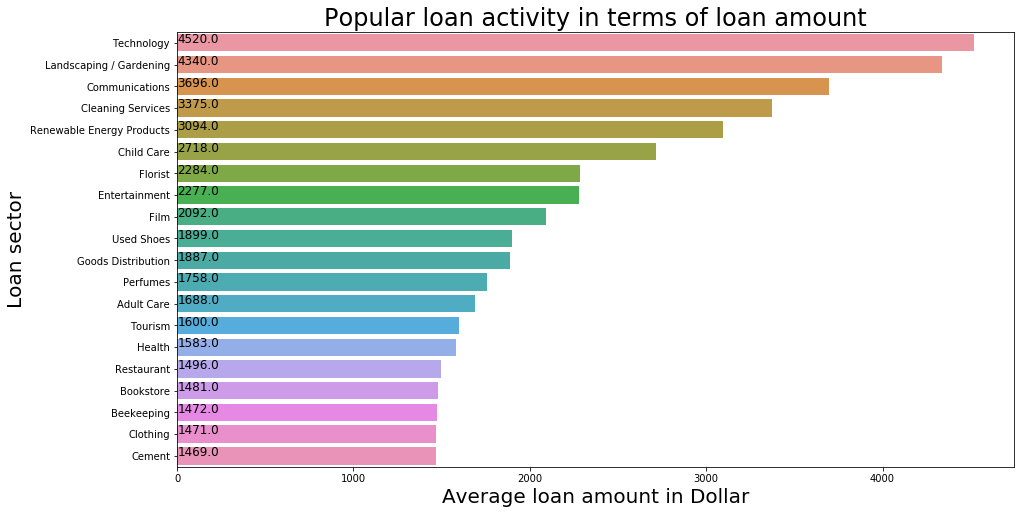

In [47]:
plt.figure(figsize=(15,8))
count = round(kiva_loans_data.groupby(['activity'])['loan_amount'].mean().sort_values(ascending=False).head(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan activity in terms of loan amount', fontsize=24)

Text(0.5,1,'Popular countries in terms of loan amount')

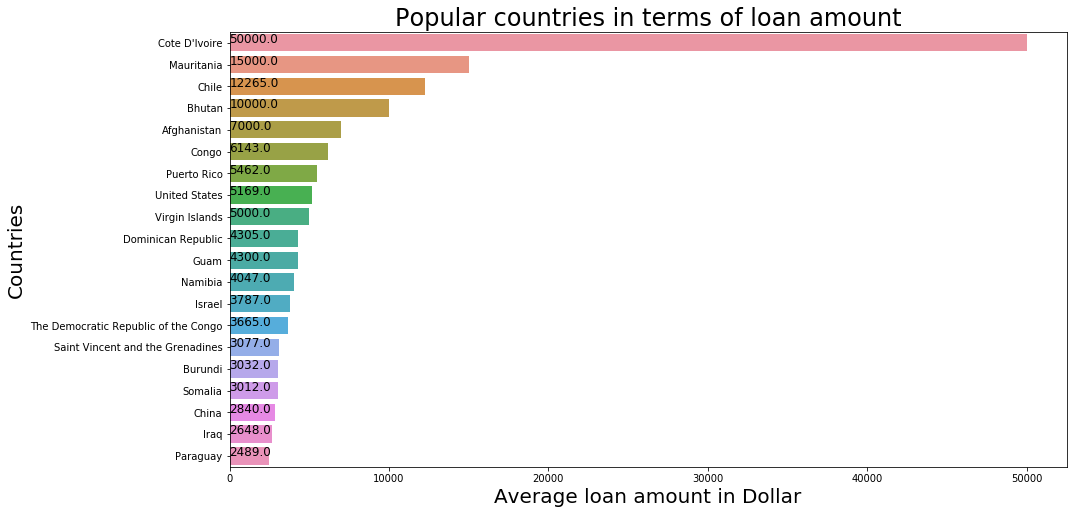

In [48]:
plt.figure(figsize=(15,8))
count = round(kiva_loans_data.groupby(['country'])['loan_amount'].mean().sort_values(ascending=False).head(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('Countries', fontsize=20)
plt.title('Popular countries in terms of loan amount', fontsize=24)

Text(0.5,1,'Popular regions(locations within countries) in terms of loan amount')

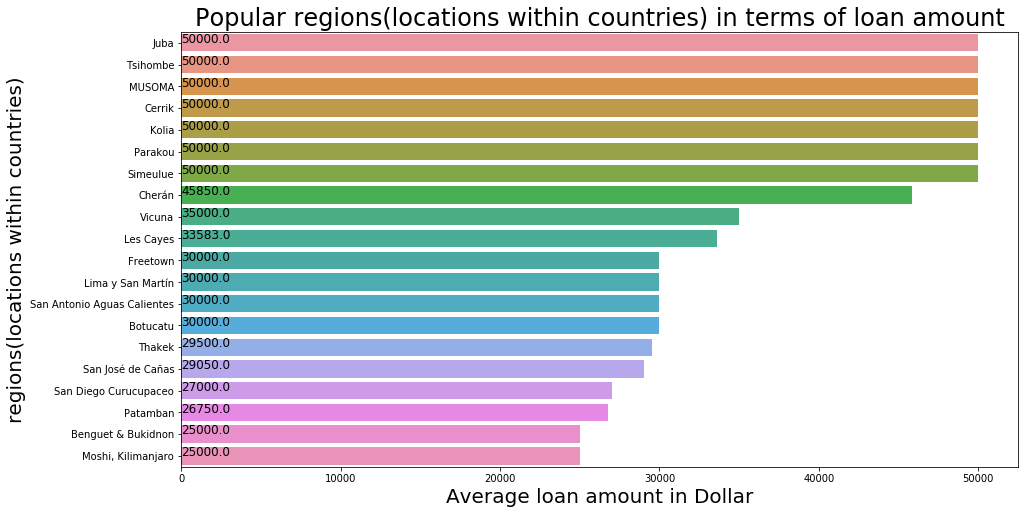

In [49]:
plt.figure(figsize=(15,8))
count = round(kiva_loans_data.groupby(['region'])['loan_amount'].mean().sort_values(ascending=False).head(20))
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Average loan amount in Dollar', fontsize=20)
plt.ylabel('regions(locations within countries)', fontsize=20)
plt.title('Popular regions(locations within countries) in terms of loan amount', fontsize=24)

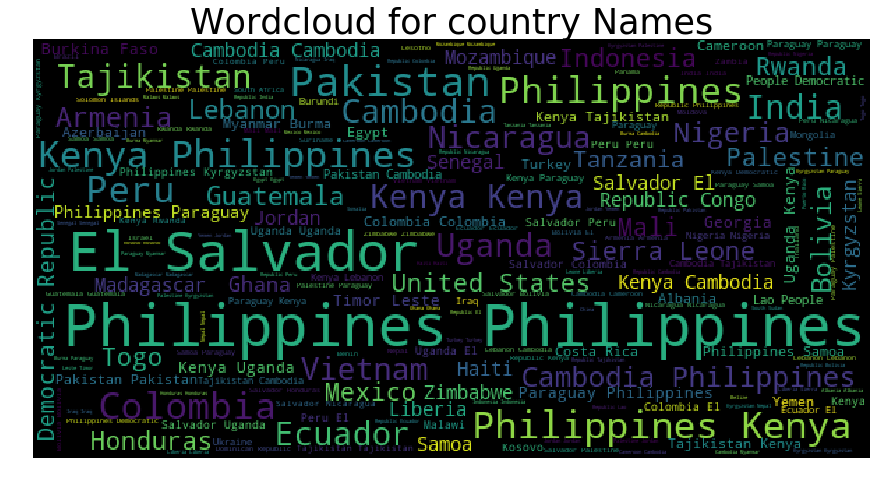

In [50]:
from wordcloud import WordCloud

names = kiva_loans_data["country"][~pd.isnull(kiva_loans_data["country"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for country Names", fontsize=35)
plt.axis("off")
plt.show() 

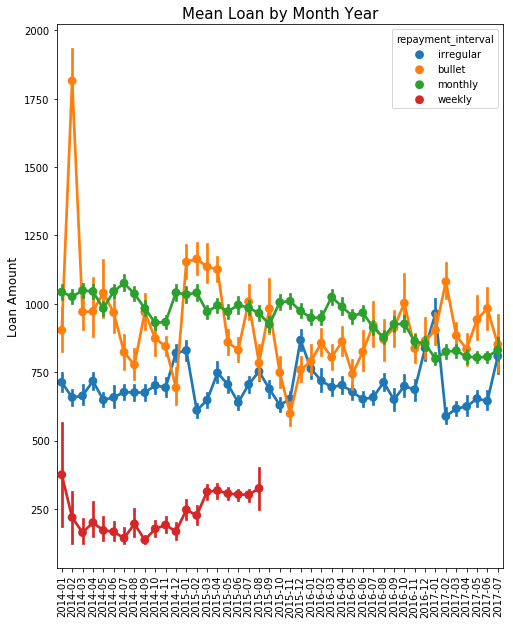

In [51]:
kiva_loans_data['date'] = pd.to_datetime(kiva_loans_data['date'])
kiva_loans_data['date_month_year'] = kiva_loans_data['date'].dt.to_period("M")
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='date_month_year', y='loan_amount', 
                   data=kiva_loans_data, hue='repayment_interval')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Mean Loan by Month Year", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Loan Amount", fontsize=12)
plt.show()

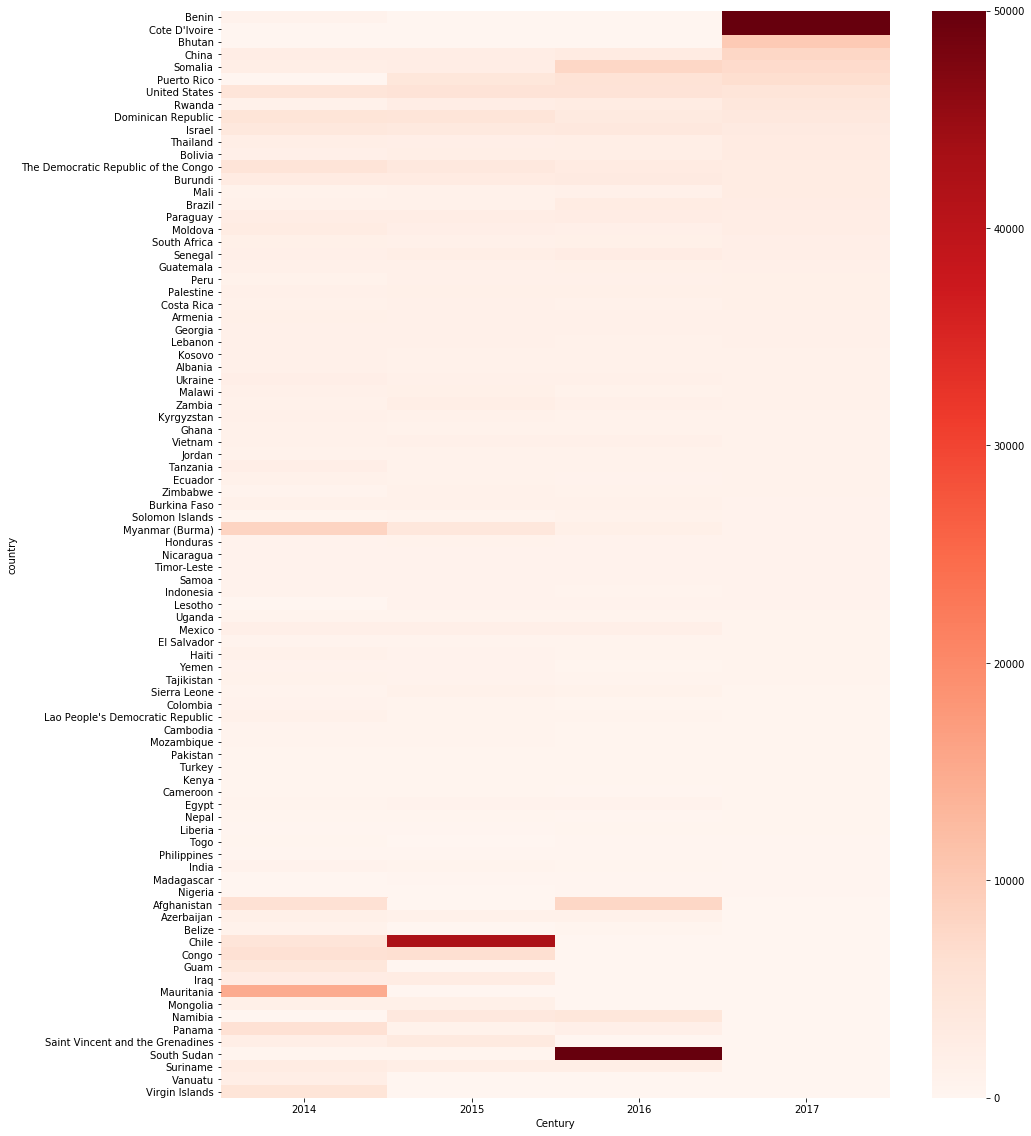

In [52]:
kiva_loans_data['Century'] = kiva_loans_data.date.dt.year
loan = kiva_loans_data.groupby(['country', 'Century'])['loan_amount'].mean().unstack()
loan = loan.sort_values([2017], ascending=False)
f, ax = plt.subplots(figsize=(15, 20)) 
loan = loan.fillna(0)
temp = sns.heatmap(loan, cmap='Reds')
plt.show()

In [53]:
sector_repayment = ['sector', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(kiva_loans_data[sector_repayment[0]], kiva_loans_data[sector_repayment[1]]).style.background_gradient(cmap = cm)

In [54]:
sector_repayment = ['country', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(kiva_loans_data[sector_repayment[0]], kiva_loans_data[sector_repayment[1]]).style.background_gradient(cmap = cm)

id  funded_amount  loan_amount  partner_id  \
id              1.000000      -0.049578    -0.027488    0.154787   
funded_amount  -0.049578       1.000000     0.945044   -0.075276   
loan_amount    -0.027488       0.945044     1.000000   -0.071251   
partner_id      0.154787      -0.075276    -0.071251    1.000000   
term_in_months -0.055832       0.149310     0.184795    0.094878   
lender_count   -0.095418       0.849168     0.798697   -0.008575   
Century         0.946739      -0.045855    -0.030272    0.146511   

                term_in_months  lender_count   Century  
id                   -0.055832     -0.095418  0.946739  
funded_amount         0.149310      0.849168 -0.045855  
loan_amount           0.184795      0.798697 -0.030272  
partner_id            0.094878     -0.008575  0.146511  
term_in_months        1.000000      0.227283 -0.044696  
lender_count          0.227283      1.000000 -0.091028  
Century              -0.044696     -0.091028  1.000000

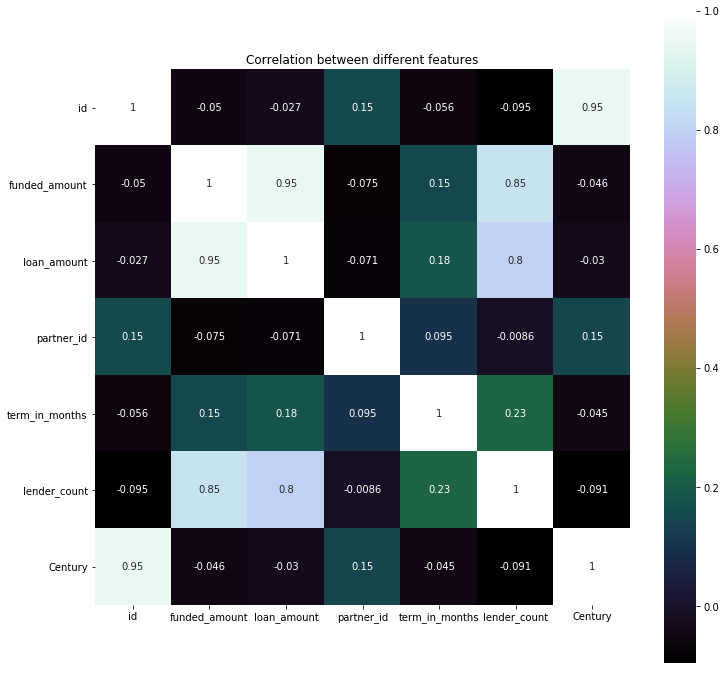

In [55]:
#Correlation Matrix
corr = kiva_loans_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between different features')
corr

[Text(0,0.5,'Frequency'), Text(0.5,0,'Terms in months')]

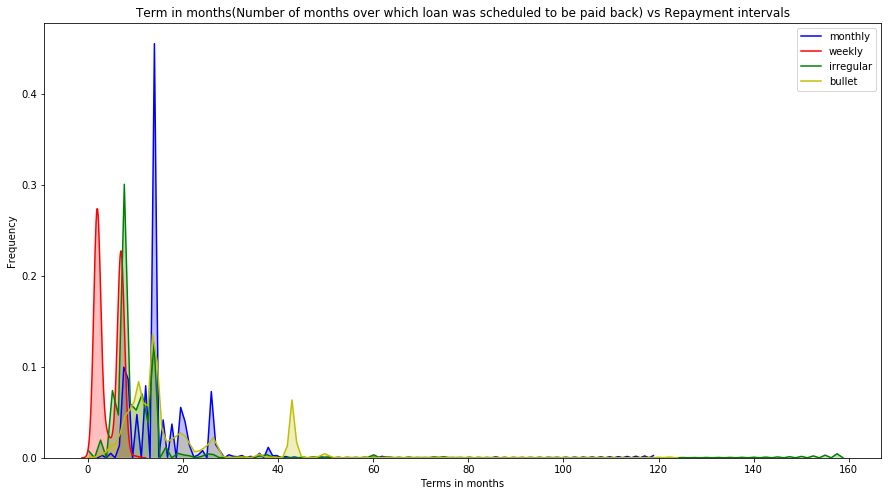

In [56]:
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(kiva_loans_data['term_in_months'][kiva_loans_data['repayment_interval'] == 'monthly'] , color='b',shade=True, label='monthly')
ax=sns.kdeplot(kiva_loans_data['term_in_months'][kiva_loans_data['repayment_interval'] == 'weekly'] , color='r',shade=True, label='weekly')
ax=sns.kdeplot(kiva_loans_data['term_in_months'][kiva_loans_data['repayment_interval'] == 'irregular'] , color='g',shade=True, label='irregular')
ax=sns.kdeplot(kiva_loans_data['term_in_months'][kiva_loans_data['repayment_interval'] == 'bullet'] , color='y',shade=True, label='bullet')
plt.title('Term in months(Number of months over which loan was scheduled to be paid back) vs Repayment intervals')
ax.set(xlabel='Terms in months', ylabel='Frequency')

In [57]:
temp = loan_themes_by_region_data['forkiva'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Loan theme specifically for Kiva V.S. Loan theme not specifically for Kiva')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [58]:
kiva_loans_data.posted_time = pd.to_datetime(kiva_loans_data['posted_time'])
kiva_loans_data.disbursed_time = pd.to_datetime(kiva_loans_data['disbursed_time'])
kiva_loans_data.funded_time = pd.to_datetime(kiva_loans_data['funded_time'])

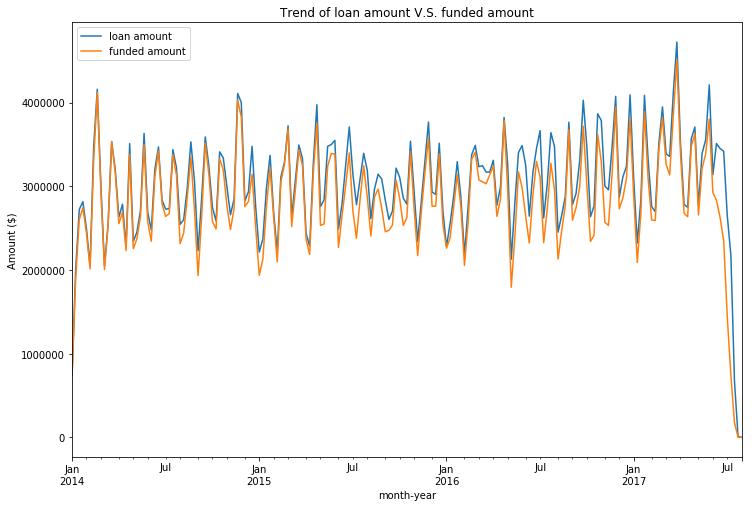

In [59]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['posted_time'])
plt.figure(figsize = (12, 8))
ax = kiva_loans_data['loan_amount'].resample('w').sum().plot()
ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(kiva_loans_data['posted_time'].min()), 
             pd.to_datetime(kiva_loans_data['posted_time'].max())))
ax.legend(["loan amount", "funded amount"])
plt.title('Trend of loan amount V.S. funded amount')

plt.show()

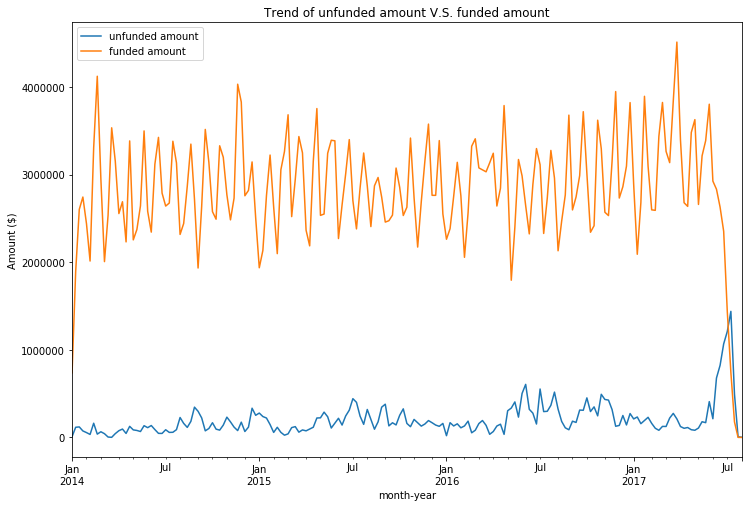

In [60]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['posted_time'])

kiva_loans_data['unfunded_amount'] = kiva_loans_data['loan_amount'] - kiva_loans_data['funded_amount']
plt.figure(figsize = (12, 8))
ax = kiva_loans_data['unfunded_amount'].resample('w').sum().plot()
ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(kiva_loans_data['posted_time'].min()), 
             pd.to_datetime(kiva_loans_data['posted_time'].max())))
ax.legend(["unfunded amount", "funded amount"])
plt.title('Trend of unfunded amount V.S. funded amount')

plt.show()

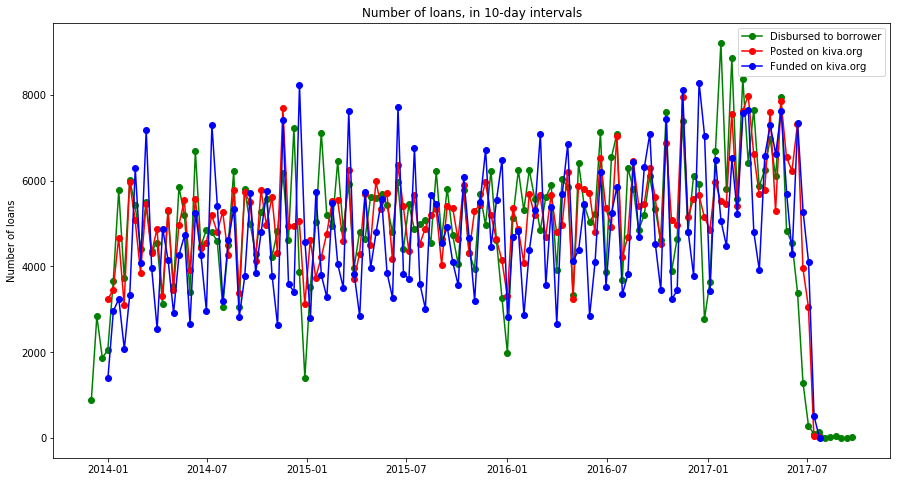

In [61]:
temp_data = kiva_loans_data.copy()
temp_data['count']= 1  #add 1 to each row so we can count number of loans 
disbursed = temp_data.set_index(temp_data['disbursed_time'])
#disbursed.head()
disbursed = disbursed.resample('10D').sum()

posted = temp_data.set_index(temp_data['posted_time'])
posted = posted.resample('10D').sum()

funded = temp_data.set_index(temp_data['funded_time'])
funded = funded.resample('10D').sum()

plt.figure(figsize=(15,8))
plt.plot(disbursed['count'], color='green', label='Disbursed to borrower', marker='o')
plt.plot(posted['count'], color='red', label='Posted on kiva.org', marker='o')
plt.plot(funded['count'], color='blue', label='Funded on kiva.org', marker='o')
plt.legend(loc='down right')
plt.title("Number of loans, in 10-day intervals")
plt.ylabel("Number of loans")
plt.show()

In [62]:
loan_use_in_india = kiva_loans_data['use'][kiva_loans_data['country'] == 'India']
percentages = round(loan_use_in_india.value_counts() / len(loan_use_in_india) * 100, 2)[:13]
trace = go.Pie(labels=percentages.keys(), values=percentages.values, hoverinfo='label+percent', 
                textfont=dict(size=18, color='#000000'))
data = [trace]
layout = go.Layout(width=800, height=800, title='Top 13 loan uses in India',titlefont= dict(size=20), 
                   legend=dict(x=0.1,y=-5))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, show_link=False)

In [63]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='India'])
temp.head()

Partner ID Field Partner Name                       sector  \
11972         225             Novica                      Artisan   
11986         225             Novica                      Artisan   
11987         225             Novica                      Artisan   
11994         225             Novica                      Artisan   
12085         238      WSDS-Initiate  General Financial Inclusion   

         Loan Theme ID Loan Theme Type country forkiva     region geocode_old  \
11972  a1050000000T14Q         Artisan   India      No       Agra         NaN   
11986  a1050000000T14Q         Artisan   India      No    Haryana         NaN   
11987  a1050000000T14Q         Artisan   India      No     Jaipur         NaN   
11994  a1050000000T14Q         Artisan   India      No  New Delhi         NaN   
12085  a1050000000sjE7     Underserved   India      No  Bishnupur         NaN   

       ISO  number  amount      LocationName  \
11972  IND       1    2100       Agra, India   
11986  IND       1    1200    Haryana, India   
11987  IND       2    4000     Jaipur, India   
11994  IND       4    6050  New Delhi, India   
12085  IND      12    2675  Bishnupur, India   

                                 geocode  \
11972  [(27.1766701, 78.00807449999999)]   
11986          [(29.0587757, 76.085601)]   
11987         [(26.9124336, 75.7872709)]   
11994         [(28.6139391, 77.2090212)]   
12085         [(23.0678795, 87.3165222)]   

                                                names  \
11972                Agra; Agra; Uttar Pradesh; India   
11986                                  Haryana; India   
11987                Jaipur; Jaipur; Rajasthan; India   
11994                         New Delhi; Delhi; India   
12085  Bishnupur; Bankura; West Bengal; India; 722122   

                                   geo        lat        lon mpi_region  \
11972  (27.1766701, 78.00807449999999)  27.176670  78.008075        IND   
11986          (29.0587757, 76.085601)  29.058776  76.085601        IND   
11987         (26.9124336, 75.7872709)  26.912434  75.787271        IND   
11994         (28.6139391, 77.2090212)  28.613939  77.209021        IND   
12085         (23.0678795, 87.3165222)  23.067880  87.316522        IND   

      mpi_geo  rural_pct  
11972     NaN        0.0  
11986     NaN        0.0  
11987     NaN        0.0  
11994     NaN        0.0  
12085     NaN        0.0

In [64]:
# A table to show top 7 regions in India with higher funded amount
print("The top 7 regions in India with higher funded amount(Descending Order)")
top_cities = temp.sort_values(by='amount',ascending=False)
top7_cities=top_cities.head(7)
top7_cities

The top 7 regions in India with higher funded amount(Descending Order)


Partner ID           Field Partner Name                       sector  \
14366         428                       Milaap  General Financial Inclusion   
14335         428                       Milaap  General Financial Inclusion   
14279         428                       Milaap  General Financial Inclusion   
13355         334  Belghoria Janakalyan Samity  General Financial Inclusion   
14314         428                       Milaap  General Financial Inclusion   
14300         428                       Milaap  General Financial Inclusion   
14354         428                       Milaap  General Financial Inclusion   

         Loan Theme ID          Loan Theme Type country forkiva  \
14366  a1050000006Bkn5          Prayas: General   India      No   
14335  a1050000005zJrh           SMGBK: General   India      No   
14279  a1050000006Bkn5          Prayas: General   India      No   
13355  a1050000002VkWz              Underserved   India     Yes   
14314  a1050000006TqMf  Mahashakti: Underserved   India      No   
14300  a1050000007Qn1B           Apani: General   India      No   
14354  a1050000006TqMf  Mahashakti: Underserved   India      No   

              region geocode_old  ISO  number  amount          LocationName  \
14366  Surendranagar         NaN  IND     401  153575  Surendranagar, India   
14335          Nadia         NaN  IND     386  121200          Nadia, India   
14279          Dahod         NaN  IND     419  112025          Dahod, India   
13355       Falakata         NaN  IND     382  109475       Falakata, India   
14314         Khurda         NaN  IND     321  106975         Khurda, India   
14300         Jaipur         NaN  IND     312  105825         Jaipur, India   
14354       Rayagada         NaN  IND     248   95500       Rayagada, India   

                                 geocode  \
14366         [(22.7738938, 71.6673352)]   
14335  [(23.4709656, 88.55653099999999)]   
14279         [(22.8379314, 74.2531465)]   
13355          [(26.517486, 89.2039195)]   
14314  [(20.1934552, 85.63320929999999)]   
14300         [(26.9124336, 75.7872709)]   
14354          [(19.171209, 83.4163226)]   

                                                  names  \
14366                     Surendranagar; Gujarat; India   
14335                         Nadia; West Bengal; India   
14279                      Dahod; Dahod; Gujarat; India   
13355  Falakata; Alipurduar; West Bengal; India; 735211   
14314                   Khurdha; Khordha; Odisha; India   
14300                  Jaipur; Jaipur; Rajasthan; India   
14354                 Rayagada; Rayagada; Odisha; India   

                                   geo        lat        lon mpi_region  \
14366         (22.7738938, 71.6673352)  22.773894  71.667335        IND   
14335  (23.4709656, 88.55653099999999)  23.470966  88.556531        IND   
14279         (22.8379314, 74.2531465)  22.837931  74.253146        IND   
13355          (26.517486, 89.2039195)  26.517486  89.203919        IND   
14314  (20.1934552, 85.63320929999999)  20.193455  85.633209        IND   
14300         (26.9124336, 75.7872709)  26.912434  75.787271        IND   
14354          (19.171209, 83.4163226)  19.171209  83.416323        IND   

      mpi_geo  rural_pct  
14366     NaN       40.0  
14335     NaN       40.0  
14279     NaN       40.0  
13355     NaN       82.0  
14314     NaN       40.0  
14300     NaN       40.0  
14354     NaN       40.0

Text(0.5,1,'Top 7 funded regions in India')

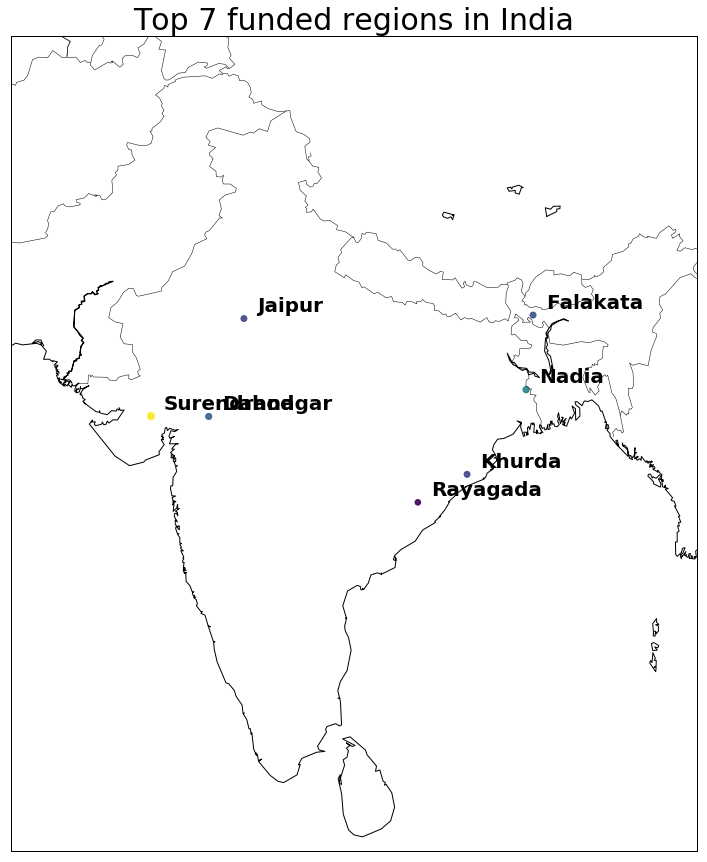

In [65]:
# Plotting these Top 7 funded regions on India map. Circles are sized according to the 
# regions of the india

plt.subplots(figsize=(20, 15))
map = Basemap(width=4500000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(top7_cities['lon'])
lt=array(top7_cities['lat'])
pt=array(top7_cities['amount'])
nc=array(top7_cities['region'])

x, y = map(lg, lt)
population_sizes = top7_cities["amount"].apply(lambda x: int(x / 3000))
plt.scatter(x, y, s=population_sizes, marker="o", c=population_sizes, alpha=0.9)


for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=20, fontweight='bold')

plt.title('Top 7 funded regions in India',fontsize=30)

Text(0.5,1,'Most dominant field partner names in India with count')

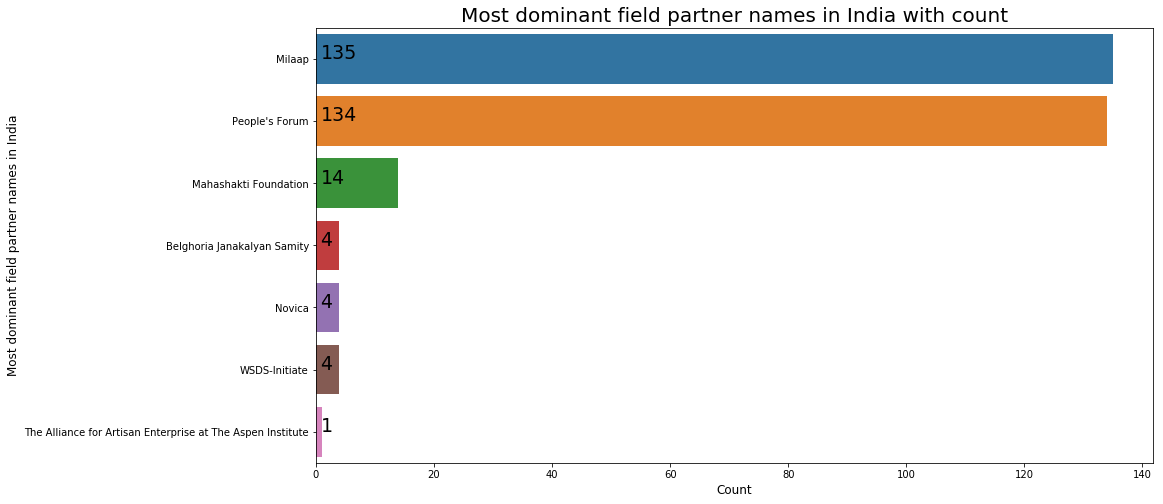

In [66]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='India'])
plt.figure(figsize=(15,8))
count = temp['Field Partner Name'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Most dominant field partner names in India', fontsize=12)
plt.title("Most dominant field partner names in India with count", fontsize=20)

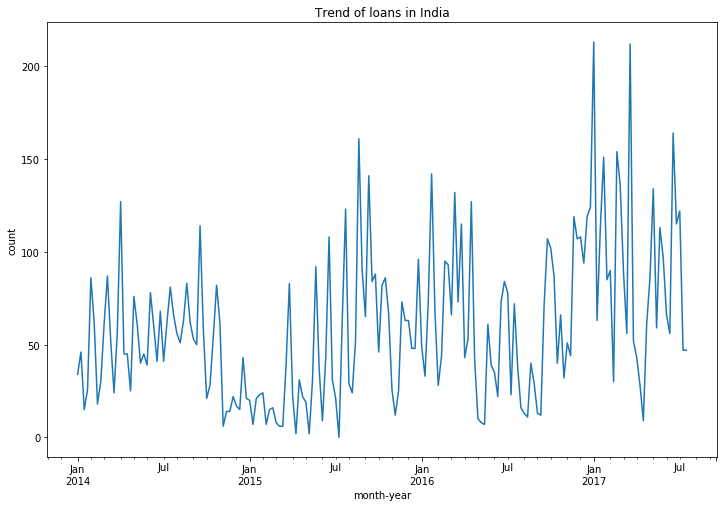

In [67]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['funded_time'])
plt.figure(figsize = (12, 8))
ax = kiva_loans_data[kiva_loans_data["country"]=='India']['funded_time'].resample('w').count().plot()
ax.set_ylabel('count')
ax.set_xlabel('month-year')
plt.title('Trend of loans in India')

plt.show()

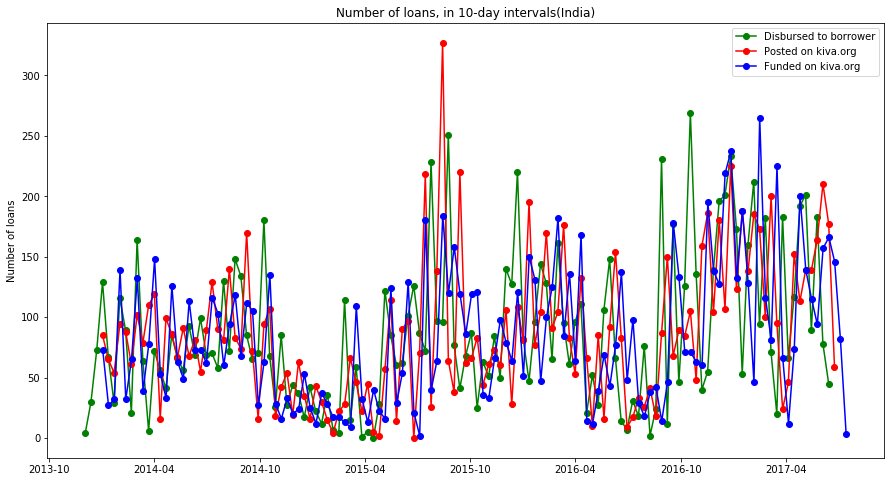

In [68]:
temp_data = kiva_loans_data.copy()
temp_data = temp_data[temp_data.country=='India']
temp_data['count']= 1  #add 1 to each row so we can count number of loans 
disbursed = temp_data.set_index(temp_data['disbursed_time'])
#disbursed.head()
disbursed = disbursed.resample('10D').sum()

posted = temp_data.set_index(temp_data['posted_time'])
posted = posted.resample('10D').sum()

funded = temp_data.set_index(temp_data['funded_time'])
funded = funded.resample('10D').sum()

plt.figure(figsize=(15,8))
plt.plot(disbursed['count'], color='green', label='Disbursed to borrower', marker='o')
plt.plot(posted['count'], color='red', label='Posted on kiva.org', marker='o')
plt.plot(funded['count'], color='blue', label='Funded on kiva.org', marker='o')
plt.legend(loc='down right')
plt.title("Number of loans, in 10-day intervals(India)")
plt.ylabel("Number of loans")
plt.show()

In [69]:
loan_use_in_Philippines = kiva_loans_data['use'][kiva_loans_data['country'] == 'Philippines']
percentages = round(loan_use_in_Philippines.value_counts() / len(loan_use_in_Philippines) * 100, 2)[:13]
trace = go.Pie(labels=percentages.keys(), values=percentages.values, hoverinfo='label+percent', 
                textfont=dict(size=18, color='#000000'))
data = [trace]
layout = go.Layout(width=800, height=800, title='Top 13 loan uses in Philippines',titlefont= dict(size=20), 
                   legend=dict(x=0.1,y=-5))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, show_link=False)

In [70]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='Philippines'])
temp.head()

Partner ID          Field Partner Name                       sector  \
3321         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
3322         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
3323         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
3324         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
3325         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   

        Loan Theme ID Loan Theme Type      country forkiva  \
3321  a1050000000wf0V         General  Philippines      No   
3322  a1050000000wf0V         General  Philippines      No   
3323  a1050000000wf0V         General  Philippines      No   
3324  a1050000000wf0V         General  Philippines      No   
3325  a1050000000wf0V         General  Philippines      No   

                                                 region geocode_old  ISO  \
3321  #2 Bayabas St. San Gabriel Tuguegarao City,Cag...         NaN  PHL   
3322           #52C Pagaliluan St. Gosi Sur, Tuguegarao         NaN  PHL   
3323        214 Bonifacio St. Calaocan, Alicia, Isabela         NaN  PHL   
3324        31 C, PENGUE RUYU, TUGUEGARAO CITY, CAGAYAN         NaN  PHL   
3325                69, TANZA, TUGUEGARAO CITY, CAGAYAN         NaN  PHL   

      number  amount                                       LocationName  \
3321       1     500  #2 Bayabas St. San Gabriel Tuguegarao City,Cag...   
3322       1    1000  #52C Pagaliluan St. Gosi Sur, Tuguegarao, Phil...   
3323       1    1075  214 Bonifacio St. Calaocan, Alicia, Isabela, P...   
3324       1     400  31 C, PENGUE RUYU, TUGUEGARAO CITY, CAGAYAN, P...   
3325       1     400   69, TANZA, TUGUEGARAO CITY, CAGAYAN, Philippines   

                          geocode  \
3321                          NaN   
3322                          NaN   
3323                          NaN   
3324   [(17.6422839, 121.739606)]   
3325  [(17.6323524, 121.7416934)]   

                                                  names  \
3321                                                NaN   
3322                                                NaN   
3323                                                NaN   
3324  2; Pan-Philippine Highway; Tuguegarao City; Ca...   
3325  69; Cagayan Valley Road; Tuguegarao City; Caga...   

                            geo        lat         lon  \
3321           (1000.0, 1000.0)        NaN         NaN   
3322           (1000.0, 1000.0)        NaN         NaN   
3323           (1000.0, 1000.0)        NaN         NaN   
3324   (17.6422839, 121.739606)  17.642284  121.739606   
3325  (17.6323524, 121.7416934)  17.632352  121.741693   

                                mpi_region                    mpi_geo  \
3321                                   PHL                        NaN   
3322                                   PHL                        NaN   
3323                                   PHL                        NaN   
3324  Cordillera Admin Region, Philippines  (17.3512542, 121.1718851)   
3325  Cordillera Admin Region, Philippines  (17.3512542, 121.1718851)   

      rural_pct  
3321       84.0  
3322       84.0  
3323       84.0  
3324       84.0  
3325       84.0

In [71]:
# A table to show top 7 regions in Philippines with higher funded amount
print("The top 7 regions in India with higher funded amount(Descending Order)")
top_cities = temp.sort_values(by='amount',ascending=False)
top7_cities=top_cities.head(7)
top7_cities

The top 7 regions in India with higher funded amount(Descending Order)


Partner ID                           Field Partner Name  \
7294         145  Negros Women for Tomorrow Foundation (NWTF)   
7436         145  Negros Women for Tomorrow Foundation (NWTF)   
7508         145  Negros Women for Tomorrow Foundation (NWTF)   
7382         145  Negros Women for Tomorrow Foundation (NWTF)   
7407         145  Negros Women for Tomorrow Foundation (NWTF)   
7322         145  Negros Women for Tomorrow Foundation (NWTF)   
4602         125     Community Economic Ventures, Inc. (CEVI)   

                           sector    Loan Theme ID Loan Theme Type  \
7294  General Financial Inclusion  a1050000000wf0q         General   
7436  General Financial Inclusion  a1050000000wf0q         General   
7508  General Financial Inclusion  a1050000000wf0q         General   
7382  General Financial Inclusion  a1050000000wf0q         General   
7407  General Financial Inclusion  a1050000000wf0q         General   
7322  General Financial Inclusion  a1050000000wf0q         General   
4602  General Financial Inclusion  a1050000000wf0X         General   

          country forkiva                         region geocode_old  ISO  \
7294  Philippines      No          Bais, Negros Oriental         NaN  PHL   
7436  Philippines      No  Kabankalan, Negros Occidental         NaN  PHL   
7508  Philippines      No                Quezon, Palawan         NaN  PHL   
7382  Philippines      No     Dumaguete, Negros Oriental         NaN  PHL   
7407  Philippines      No  Himamaylan, Negros Occidental         NaN  PHL   
7322  Philippines      No         Brookes Point, Palawan         NaN  PHL   
4602  Philippines      No             Concepcion, Iloilo         NaN  PHL   

      number  amount                                LocationName  \
7294    2342  749800          Bais, Negros Oriental, Philippines   
7436    1981  716850  Kabankalan, Negros Occidental, Philippines   
7508    1743  702100                Quezon, Palawan, Philippines   
7382    1869  666875     Dumaguete, Negros Oriental, Philippines   
7407    1809  626975  Himamaylan, Negros Occidental, Philippines   
7322    1405  607650         Brookes Point, Palawan, Philippines   
4602    1380  595000             Concepcion, Iloilo, Philippines   

                          geocode  \
7294   [(9.5915686, 123.1211792)]   
7436   [(9.9134117, 122.8535755)]   
7508   [(9.4184634, 118.2526623)]   
7382   [(9.3068402, 123.3054467)]   
7407  [(10.0902184, 122.8683684)]   
7322    [(8.8189341, 117.784246)]   
4602  [(11.2147313, 123.1044322)]   

                                                  names  \
7294  Bais City; Negros Oriental; Central Visayas; P...   
7436  Kabankalan; Negros Occidental; Western Visayas...   
7508             Quezon; Palawan; MIMAROPA; Philippines   
7382  Dumaguete; Negros Oriental; Central Visayas; P...   
7407  Himamaylan City; Negros Occidental; Western Vi...   
7322     Brooke's Point; Palawan; MIMAROPA; Philippines   
4602   Concepcion; Iloilo; Western Visayas; Philippines   

                            geo        lat         lon  \
7294   (9.5915686, 123.1211792)   9.591569  123.121179   
7436   (9.9134117, 122.8535755)   9.913412  122.853575   
7508   (9.4184634, 118.2526623)   9.418463  118.252662   
7382   (9.3068402, 123.3054467)   9.306840  123.305447   
7407  (10.0902184, 122.8683684)  10.090218  122.868368   
7322    (8.8189341, 117.784246)   8.818934  117.784246   
4602  (11.2147313, 123.1044322)  11.214731  123.104432   

                        mpi_region                           mpi_geo  \
7294  Central Visayas, Philippines         (10.2968562, 123.8886774)   
7436  Central Visayas, Philippines         (10.2968562, 123.8886774)   
7508         Mimaropa, Philippines  (9.843206499999999, 118.7364783)   
7382  Central Visayas, Philippines         (10.2968562, 123.8886774)   
7407  Western Visayas, Philippines         (11.0049836, 122.5372741)   
7322         Mimaropa, Philippines  (9.843206499999999, 118.7364783)   
4602  Western Visayas, 

Text(0.5,1,'Most dominant field partner names in Philippines with count')

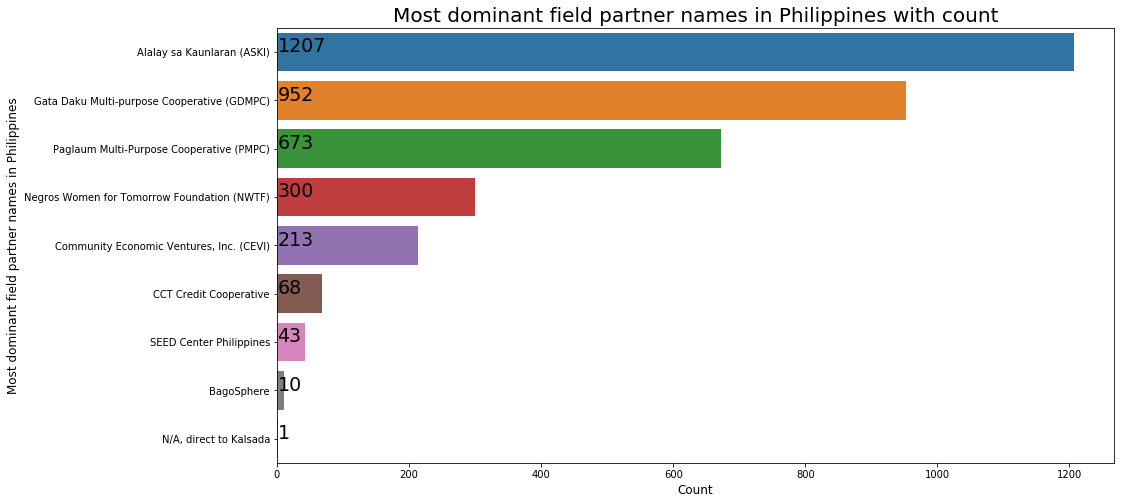

In [72]:
temp = pd.DataFrame(loan_themes_by_region_data[loan_themes_by_region_data["country"]=='Philippines'])
plt.figure(figsize=(15,8))
count = temp['Field Partner Name'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Most dominant field partner names in Philippines', fontsize=12)
plt.title("Most dominant field partner names in Philippines with count", fontsize=20)

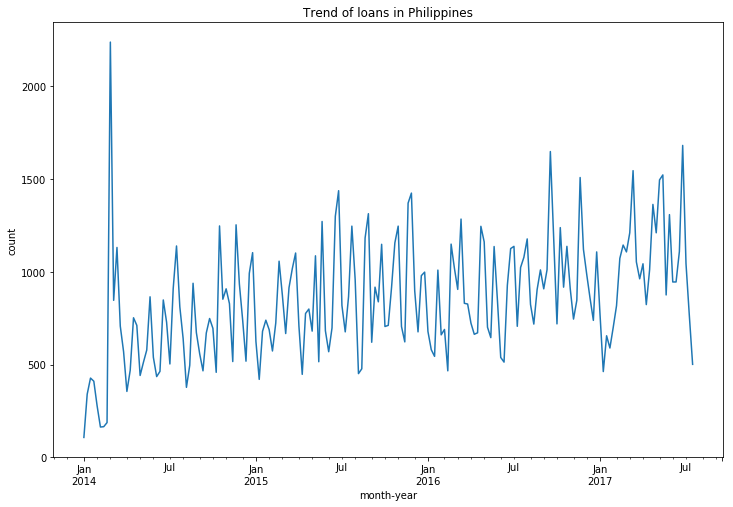

In [73]:
kiva_loans_data.index = pd.to_datetime(kiva_loans_data['funded_time'])
plt.figure(figsize = (12, 8))
ax = kiva_loans_data[kiva_loans_data["country"]=='Philippines']['funded_time'].resample('w').count().plot()
ax.set_ylabel('count')
ax.set_xlabel('month-year')
plt.title('Trend of loans in Philippines')

plt.show()

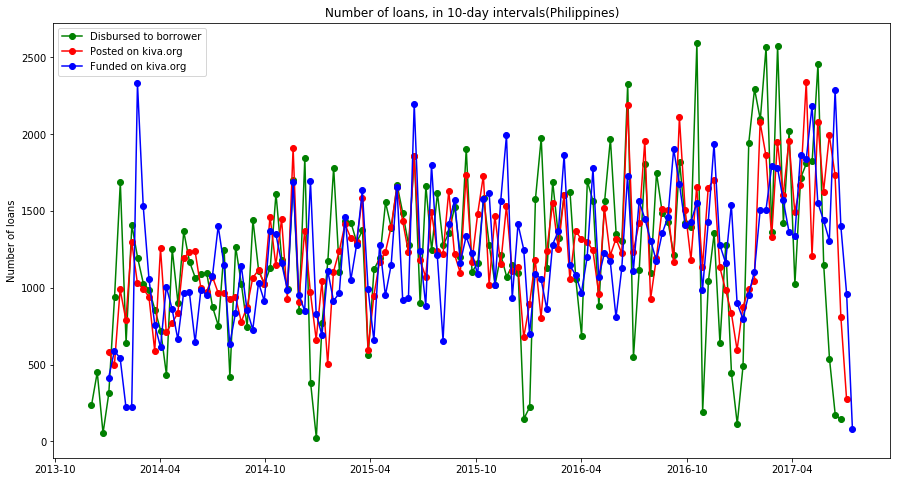

In [74]:
temp_data = kiva_loans_data.copy()
temp_data = temp_data[temp_data.country=='Philippines']
temp_data['count']= 1  #add 1 to each row so we can count number of loans 
disbursed = temp_data.set_index(temp_data['disbursed_time'])
#disbursed.head()
disbursed = disbursed.resample('10D').sum()

posted = temp_data.set_index(temp_data['posted_time'])
posted = posted.resample('10D').sum()

funded = temp_data.set_index(temp_data['funded_time'])
funded = funded.resample('10D').sum()

plt.figure(figsize=(15,8))
plt.plot(disbursed['count'], color='green', label='Disbursed to borrower', marker='o')
plt.plot(posted['count'], color='red', label='Posted on kiva.org', marker='o')
plt.plot(funded['count'], color='blue', label='Funded on kiva.org', marker='o')
plt.legend(loc='down right')
plt.title("Number of loans, in 10-day intervals(Philippines)")
plt.ylabel("Number of loans")
plt.show()

In [75]:
temp = loans_data['status'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='status of loans')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [76]:
temp = loans_data['distribution_model'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title=' Distribution models of loans')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [77]:
import re
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

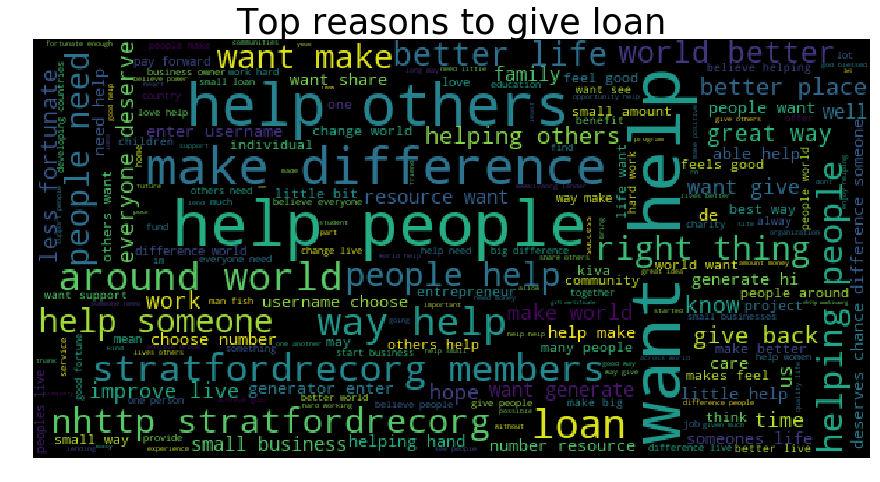

In [78]:
# remove null value from column "loan_because"
temp_data = lenders_data.dropna(subset=['loan_because'])
# convertinginto lowercase
temp_data['loan_because'] = temp_data['loan_because'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['loan_because'] = temp_data['loan_because'].map(text_prepare)


from wordcloud import WordCloud

#names = kiva_loans_data["country"][~pd.isnull(kiva_loans_data["country"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(temp_data['loan_because'].values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Top reasons to give loan", fontsize=35)
plt.axis("off")
plt.show() 

In [79]:
data = [ dict(
        type = 'scattergeo',
        lat = kiva_mpi_locations_data['lat'],
        lon = kiva_mpi_locations_data['lon'],
        text = kiva_mpi_locations_data['LocationName'],
        marker = dict(
             size = 10,
             line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = kiva_mpi_locations_data['MPI'],
            cmax = kiva_mpi_locations_data['MPI'].max(),
            colorbar=dict(
                title="Multi-dimenstional Poverty Index"
            )
        ))]
layout = dict(title = 'Multi-dimensional Poverty Index for different regions')
fig = dict( data=data, layout=layout )
py.iplot(fig)

In [80]:
print("Top 10 countries with higher Human Development Index(HDI) \n")
temp = country_stats_data.sort_values(by =['hdi'], ascending = False)
temp[['country_name','hdi']].head(10)

Top 10 countries with higher Human Development Index(HDI) 



country_name       hdi
162       Norway  0.949423
122  Switzerland  0.939131
151    Australia  0.938680
23       Germany  0.925669
167    Singapore  0.924866
114      Denmark  0.924649
95   Netherlands  0.924312
133      Ireland  0.922746
157      Iceland  0.921110
72        Canada  0.920284

In [81]:
data = [dict(
        type='choropleth',
        locations= country_stats_data['country_name'],
        locationmode='country names',
        z=country_stats_data['hdi'],
        text=country_stats_data['country_name'],
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Human Development Index(HDI)'),
)]
layout = dict(title = 'Human Development Index(HDI) for different countries',)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

Text(0.5,1,'population below poverty line for different countries in % ')

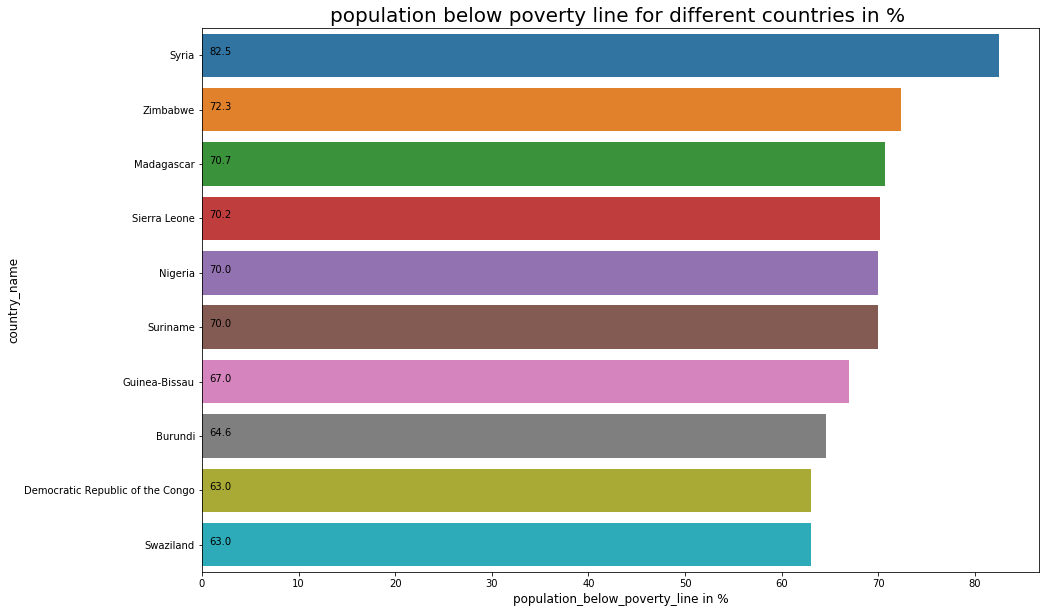

In [82]:
temp = country_stats_data.sort_values(by =['population_below_poverty_line'], ascending = False)
temp2 = temp[['country_name','population_below_poverty_line']]
temp1 = temp2.head(10)
plt.figure(figsize = (15, 10))
sns.barplot(temp1['population_below_poverty_line'], temp1['country_name'])
for i, v in enumerate(temp1['population_below_poverty_line']):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('population_below_poverty_line in %', fontsize=12)
plt.ylabel('country_name', fontsize=12)
plt.title("population below poverty line for different countries in % ", fontsize=20)

In [83]:
data = [dict(
        type='choropleth',
        locations= country_stats_data['country_name'],
        locationmode='country names',
        z=country_stats_data['population_below_poverty_line'],
        text=country_stats_data['country_name'],
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='population_below_poverty_line in %'),
)]
layout = dict(title = 'Population below poverty line for different countries in % ',)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

In [84]:
populated_countries = country_stats_data.sort_values(by='population', ascending=False)[:25]

data = [go.Scatter(
    y = populated_countries['hdi'],
    x = populated_countries['population_below_poverty_line'],
    mode='markers+text',
    marker=dict(
        size= np.log(populated_countries.population) - 2,
        color=populated_countries['hdi'],
        colorscale='Portland',
        showscale=True
    ),
    text=populated_countries['country_name'],
    textposition=["top center"]
)]
layout = go.Layout(
    title='population below poverty line V.S. HDI',
    xaxis= dict(title='population below poverty line in %'),
    yaxis=dict(title='HDI')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Text(0.5,1,'life_expectancy for different countries in years ')

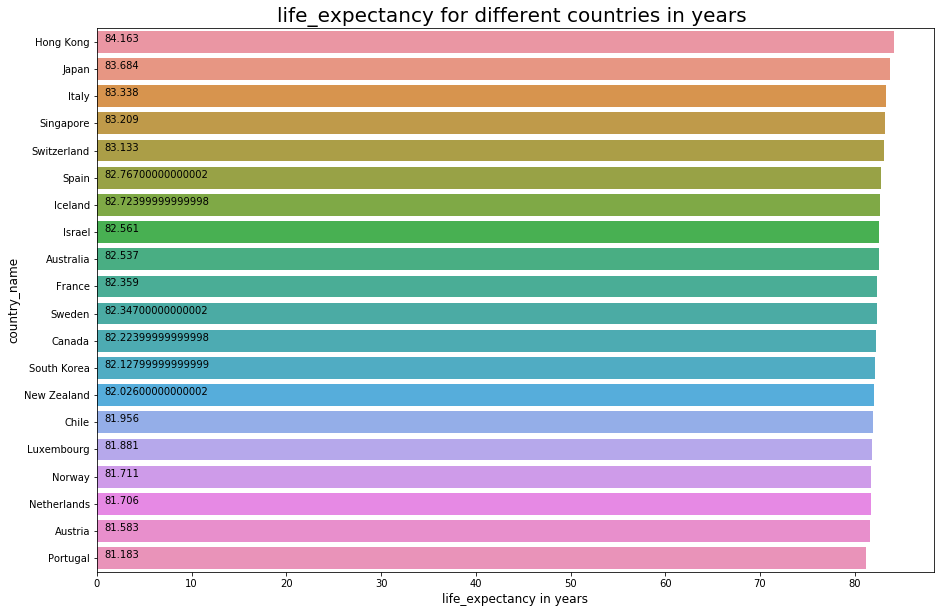

In [85]:
temp = country_stats_data.sort_values(by =['life_expectancy'], ascending = False)
temp2 = temp[['country_name','life_expectancy']]
temp1 = temp2.head(20)
plt.figure(figsize = (15, 10))
sns.barplot(temp1['life_expectancy'], temp1['country_name'])
for i, v in enumerate(temp1['life_expectancy']):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('life_expectancy in years', fontsize=12)
plt.ylabel('country_name', fontsize=12)
plt.title("life_expectancy for different countries in years ", fontsize=20)

Text(23.6762,0.5,'MPI')

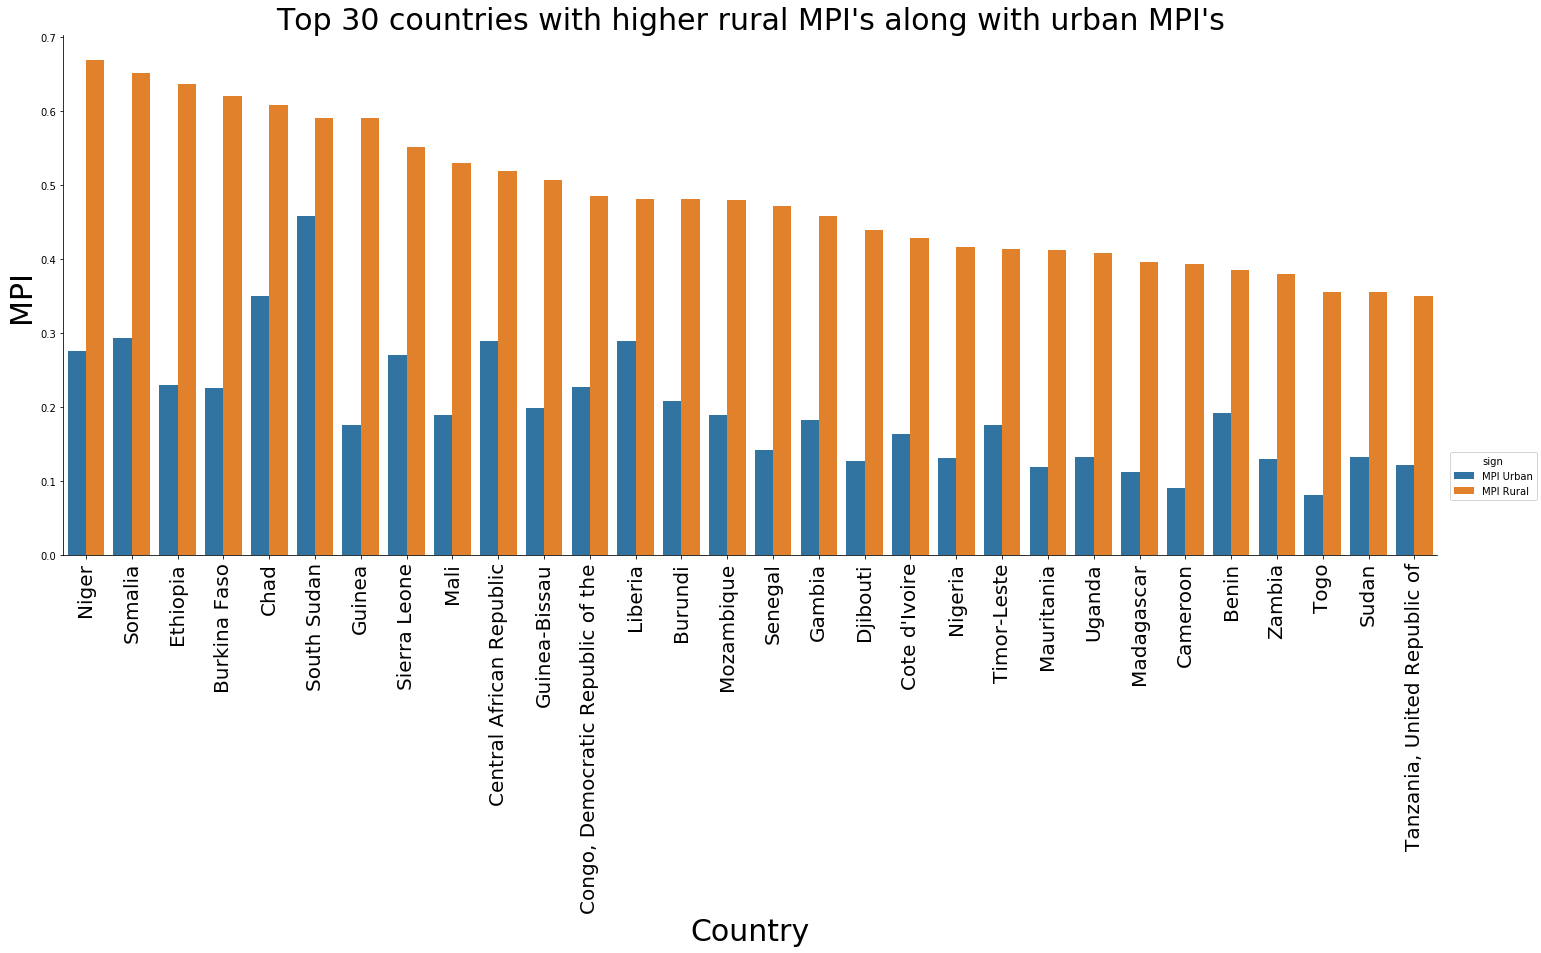

In [86]:
mpi_national_data = mpi_national_data.sort_values(by=['MPI Rural'], ascending=False).head(30)

mpi_national_urban = mpi_national_data[['Country', 'MPI Urban']]
mpi_national_urban.rename(columns={'MPI Urban':'MPI'}, inplace=True)
mpi_national_urban['sign'] = 'MPI Urban'

mpi_national_rural = mpi_national_data[['Country', 'MPI Rural']]
mpi_national_rural.rename(columns={'MPI Rural':'MPI'}, inplace=True)
mpi_national_rural['sign'] = 'MPI Rural'

mpi_urban_rural = mpi_national_urban.append(mpi_national_rural)
#mpi_urban_rural.head()
sns.factorplot(x='Country', y='MPI', hue='sign', data=mpi_urban_rural, kind='bar', size=8, aspect=2.5)
plt.xticks(rotation=90, size = 20)
plt.title("Top 30 countries with higher rural MPI's along with urban MPI's", size = 30)
plt.xlabel('Country', fontsize=30)
plt.ylabel('MPI', fontsize=30)

Text(26.1666,0.5,'Headcount Ratio')

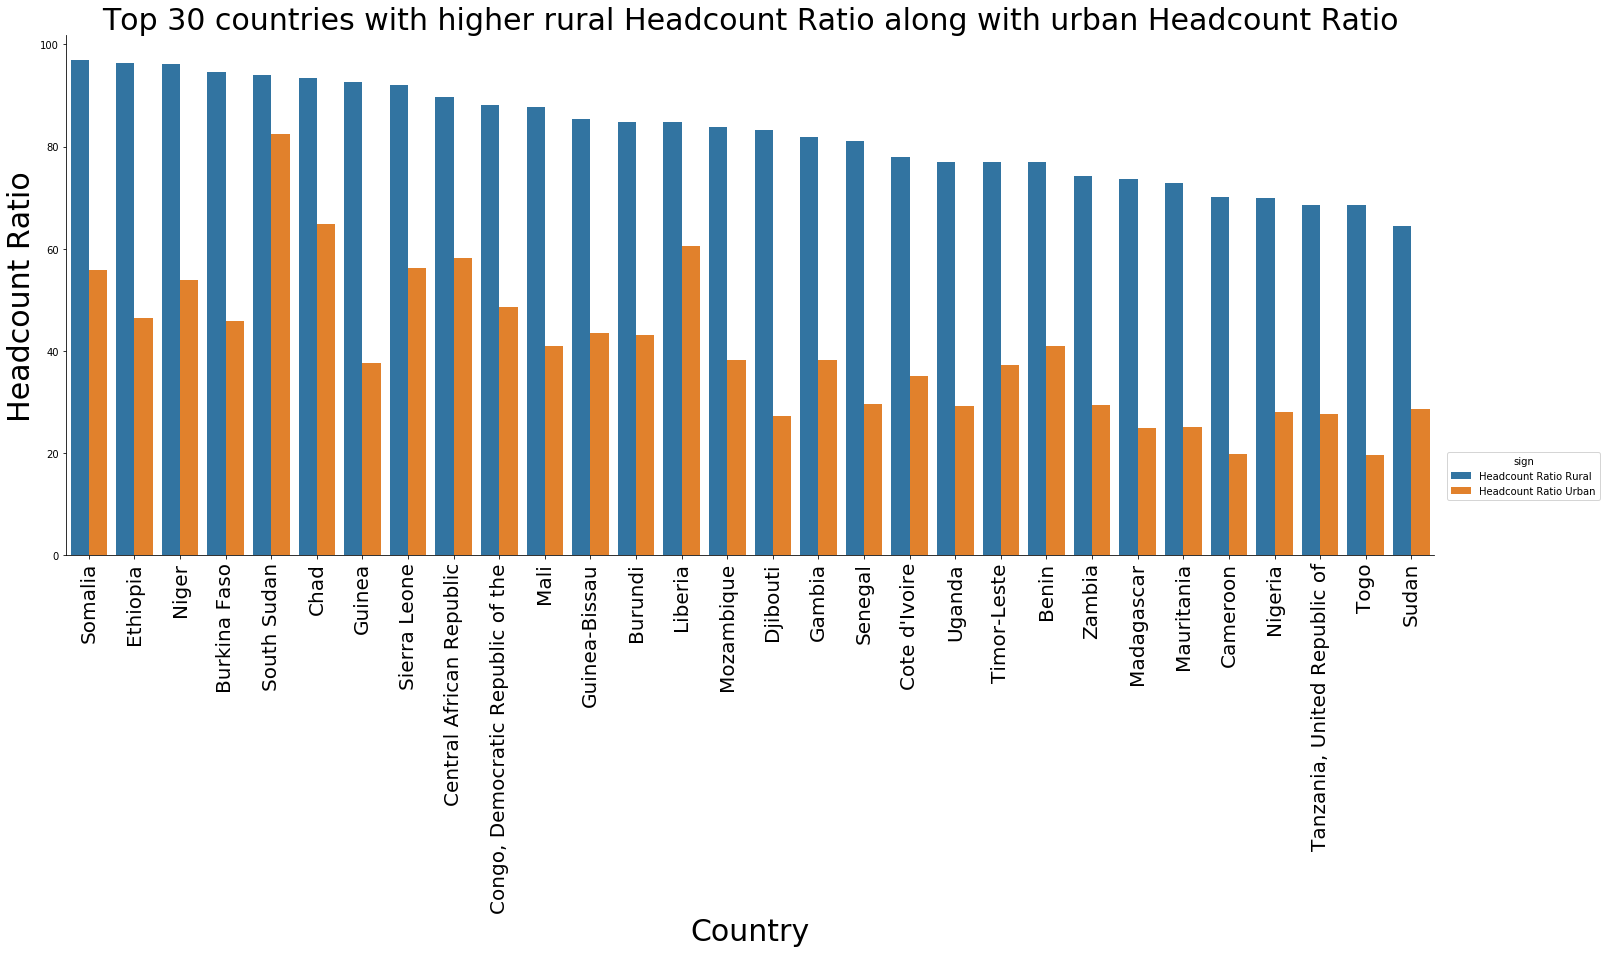

In [87]:
mpi_national_data = mpi_national_data.sort_values(by=['Headcount Ratio Rural'], ascending=False).head(30)

mpi_national_urban = mpi_national_data[['Country', 'Headcount Ratio Rural']]
mpi_national_urban.rename(columns={'Headcount Ratio Rural':'Headcount Ratio'}, inplace=True)
mpi_national_urban['sign'] = 'Headcount Ratio Rural'

mpi_national_rural = mpi_national_data[['Country', 'Headcount Ratio Urban']]
mpi_national_rural.rename(columns={'Headcount Ratio Urban':'Headcount Ratio'}, inplace=True)
mpi_national_rural['sign'] = 'Headcount Ratio Urban'

mpi_urban_rural = mpi_national_urban.append(mpi_national_rural)
#mpi_urban_rural.head()
sns.factorplot(x='Country', y='Headcount Ratio', hue='sign', data=mpi_urban_rural, kind='bar', size=8, aspect=2.5)
plt.xticks(rotation=90, size = 20)
plt.title("Top 30 countries with higher rural Headcount Ratio along with urban Headcount Ratio", size = 30)
plt.xlabel('Country', fontsize=30)
plt.ylabel('Headcount Ratio', fontsize=30)

Text(26.5691,0.5,'Intensity of Deprivation')

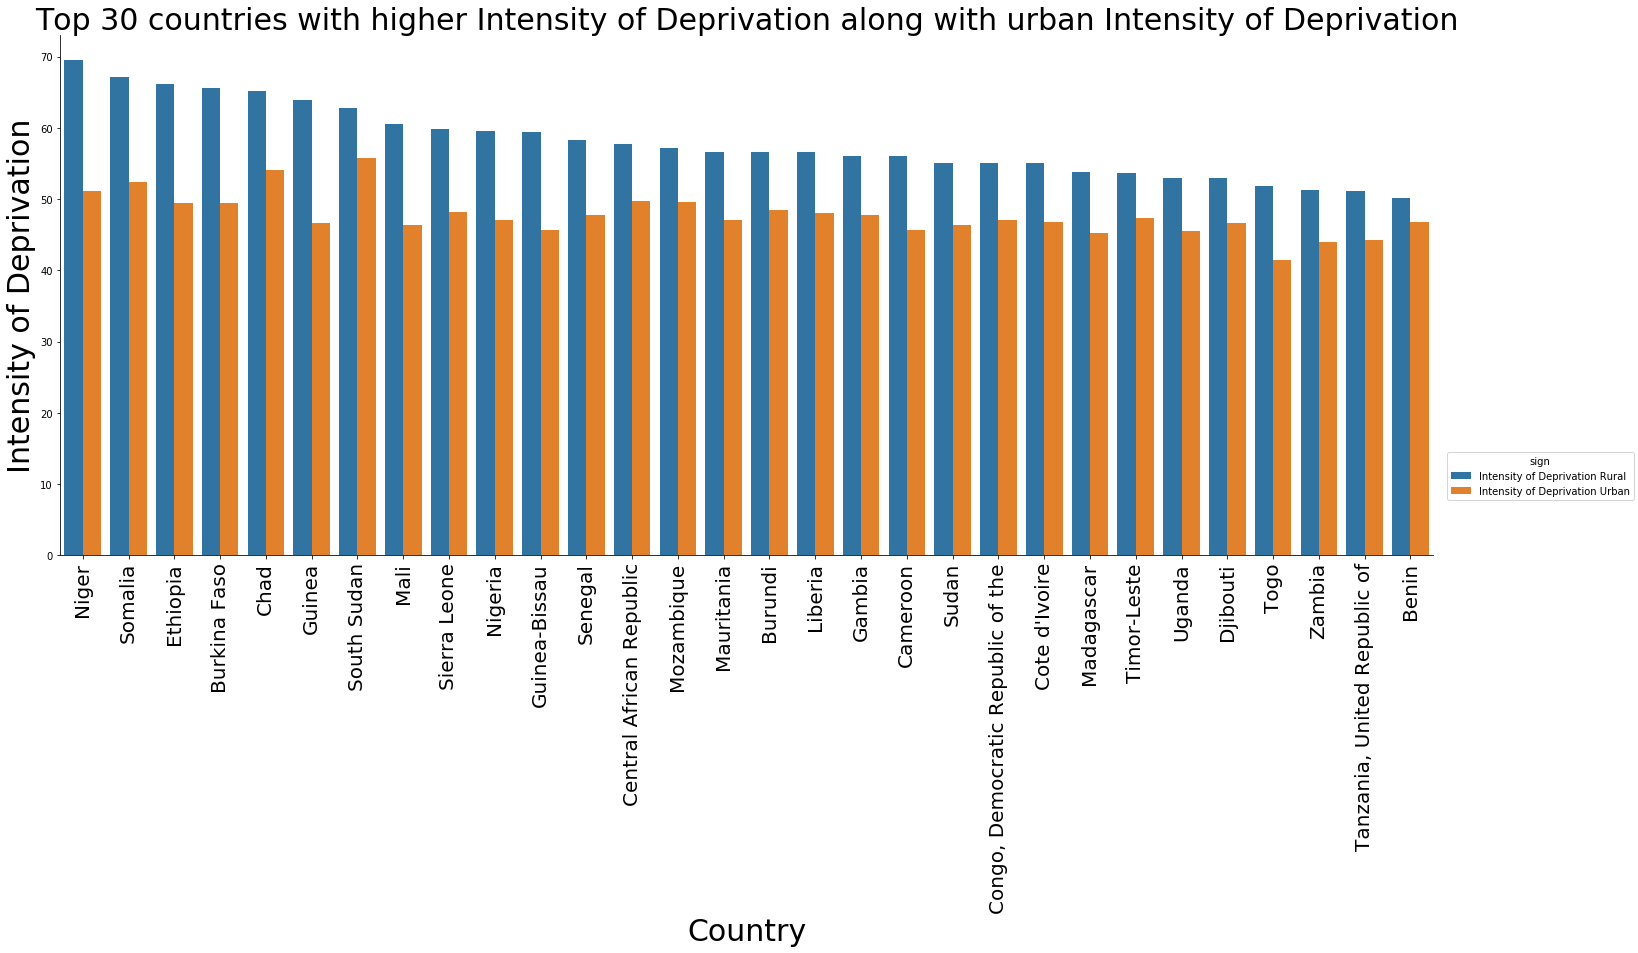

In [88]:
mpi_national_data = mpi_national_data.sort_values(by=['Intensity of Deprivation Rural'], ascending=False).head(30)

mpi_national_urban = mpi_national_data[['Country', 'Intensity of Deprivation Rural']]
mpi_national_urban.rename(columns={'Intensity of Deprivation Rural':'Intensity of Deprivation'}, inplace=True)
mpi_national_urban['sign'] = 'Intensity of Deprivation Rural'

mpi_national_rural = mpi_national_data[['Country', 'Intensity of Deprivation Urban']]
mpi_national_rural.rename(columns={'Intensity of Deprivation Urban':'Intensity of Deprivation'}, inplace=True)
mpi_national_rural['sign'] = 'Intensity of Deprivation Urban'

mpi_urban_rural = mpi_national_urban.append(mpi_national_rural)
#mpi_urban_rural.head()
sns.factorplot(x='Country', y='Intensity of Deprivation', hue='sign', data=mpi_urban_rural, kind='bar', size=8, aspect=2.5)
plt.xticks(rotation=90, size = 20)
plt.title("Top 30 countries with higher Intensity of Deprivation along with urban Intensity of Deprivation", size = 30)
plt.xlabel('Country', fontsize=30)
plt.ylabel('Intensity of Deprivation', fontsize=30)

**SUMMARY**

Agriculture Sector is more frequent in terms of number of loans followed by Food.

Types of interval payments monthly, irregular, bullet and weekly. Out of which monthly is more frequent and weekly is less frequent.

Philippines is most frequent countries who got more loans followed by Kenya.

Weekly repayment interval loan had taken by only Kenya country.

In world region, sub-Saharan Africa got more number of loans.

Number of lenders contributing to loan(lender_count) is 8 whose count is high followed by 7 and 9.

Top 2 loan activity which got more number of funded are Farming and general Store.

Out of 302 Kiva Field Partners , Alalay sa Kaunlaran (ASKI) did higher number of funding followed by SEF International and Gata Daku Multi-purpose Cooperative (GDMPC).

14 months over which loan was scheduled to be paid back have taken higher times followed by 8 and 11.

The average amount is funded more by Male than Female.

Approx. 80 % borrower are Female and approx. 20 % borrowers are Male.

There are more Females with monthly reapyment_interval than Males.

There are more Males with irregular reapyment_interval than Females.

Entertainment sector is taking more loan followed by Wholesale.

The most popular activities are Technology and Landscaping/Gardening in terms of loans amount followed by Communications.

Cote D'lvoire is More popular country who is taking more amount of loans followed by Mauritania.

Regions(locations within countries) i.e, Juba, Tsihombe, Musoma, Cerrik, Kolia, Parakou and Simeulue are most popular regions who are taking more loans.

Repayment intervals bullet had taken more loan amount throught out the years.

In 2017, Cote D'lvoire and Benin had taken more amount of loan and in 2016, South sudan had taken.

Top mpi_regions who got more funding is Itasy, Madagascar followed by Kaduna, Nigeria.

In only 16 % loans, loan theme was specifically created for Kiva.

Most popupar use of loan is to buy a water filter to provide safe drinking water for their family.

Most of the loan amount were Disbursed to borrower at 2nd month of year ie. 2nd month of 2014, 2015, 2016 and 2017 despite not being fully funded yet.

India :

Top use of loan in india is to buy a smokeless stove followed by to expand her tailoring business by purchasing cloth materials and a sewing machine.
Most dominant field partner in India is Milaap.

Top 3 funded regions in India :
Surendranagar
Nadia
Dahod

Philippines :

Top use of loan in Philippines is to to build a sanitary toilet for her family.
Most dominant field partner in Philippines is ASKI.

Top 3 funded regions in Philippines :
Bais
Kabankalan
Quezon

99 % loans were disrtributed through field partners.

Country level Analysis for understanding povertry level :
Top 3 countries with higher Human Development Index(HDI) are Norway, Switzerland and Australia according to this data.
Out of all countries, Top most country is Syria who is population below poverty line followed by Zimbabwe.
Life expectancy of Hong kong is higher than other countries followed by japan
Top most country is Niger with higher Urban MPI and Intensity of Deprivation.(Focused on rural area)
Top most country is Somalia with higher rural headcount ratio.(Focused on rural area)